# Data Mining: Harry Potter Sorting Hat
Studente:

Harry Potter è una serie di romanzi fantasy scritta da J.K. Rowling che segue le avventure di un giovane mago, Harry, mentre frequenta la Scuola di Magia e Stregoneria di Hogwarts e affronta il potente mago oscuro Lord Voldemort.

In [102]:
from IPython.display import Image
Image(url="https://cdn.wallpapersafari.com/39/28/s9IzxG.jpg", width=800)


Come sceglie le casate il Cappello Parlante?
Il Cappello Parlante è un cappello magico che smista gli studenti nelle quattro casate di Hogwarts: Grifondoro, Serpeverde, Corvonero e Tassorosso. Durante la Cerimonia di Smistamento, il cappello viene posto sulla testa dello studente e legge nella sua mente desideri, qualità e potenziale. In base a ciò che trova, decide la casata più adatta. Si basa principalmete su alcune caratteristiche più rilevanti quali, ad esempio l'eredità genetica dei genitori, il coraggio, l'intelligenza, la lealtà, l'ambizione, la conoscenza delle arti oscure, abilità el giocare a quidditch, abilità nei duelli e creatività.

In [103]:
from IPython.display import Image
Image(url="https://th.bing.com/th/id/OIP.gfkCacIGJu_4w9Q08F8G9gHaFu?rs=1&pid=ImgDetMain", width=800)

Il dataset con il quale si è deciso di lavorare raccoglie le informazioni di streghe e maghi puramente frutto dell'immaginazione ispirati dal magico mondo di Harry Potter.
Il dataset contiene informazioni riguardo abilità e peculiarità degli studenti della scuola di magia e stregoneria di Hogwarts.

_Attributi_
Gli attributi di tale dataset sono alquanto esplici:
- Blood Status
- Coraggio
- Intelligenza
- Fedeltà
- Ambizione
- Conoscenza delle Arti Oscure
- Conoscenza del Quidditch
- Abilità nel duello
- Creatività
- Casata
- id
- Nome
- Cognome
- Età

L'obiettivo del seguente studio sarà, dunque, dopo aver studiato il dataset, quello di predire la casata di uno studente della scuola di magia e stregoneria di Hogwarts attraverso modelli di classificazione e clustering.

# Setup

In [104]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import pandas as pd
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "img")

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Tavola colori personalizzata per ogni casata
hue_palette = {
    "Gryffindor": "#D62828",
    "Ravenclaw": "#003049",
    "Hufflepuff": "#F4D35E",
    "Slytherin": "#3A5A40"
}
# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")


## Get Data

In [105]:
studenti = pd.read_csv("harry_potter_students.csv")

Diamo un'occhiata veloce ai nostri dati

In [106]:
studenti.head()

Blood Status  Bravery  Intelligence  Loyalty  Ambition  Dark Arts Knowledge  \
0   Pure-blood      NaN           NaN      NaN       NaN                  7.0   
1  Muggle-born      3.0           7.0      6.0       2.0                  5.0   
2          NaN      NaN           NaN      NaN       NaN                  NaN   
3  Muggle-born      2.0           9.0      1.0       2.0                  3.0   
4          NaN      NaN           NaN      9.0       2.0                  NaN   

   Quidditch Skills  Dueling Skills  Creativity      House     id     name  \
0               NaN             8.0         NaN        NaN   9717     Elio   
1               3.0             3.0        10.0  Ravenclaw  17150    Mirek   
2               NaN             NaN         NaN        NaN   4607     Yara   
3               0.0             5.0         8.0  Ravenclaw  14010     Theo   
4               1.0             NaN         NaN        NaN  19486  Bastian   

     surname   age  
0  Blackwood   NaN  
1  Blackwood  18.0  
2  Blackwood  18.0  
3  Blackwood  13.0  
4  Blackwood  17.0

In [107]:
studenti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Blood Status         15059 non-null  object 
 1   Bravery              15043 non-null  float64
 2   Intelligence         15019 non-null  float64
 3   Loyalty              15088 non-null  float64
 4   Ambition             15005 non-null  float64
 5   Dark Arts Knowledge  14964 non-null  float64
 6   Quidditch Skills     15089 non-null  float64
 7   Dueling Skills       15038 non-null  float64
 8   Creativity           14995 non-null  float64
 9   House                15049 non-null  object 
 10  id                   20000 non-null  int64  
 11  name                 19054 non-null  object 
 12  surname              19392 non-null  object 
 13  age                  17944 non-null  float64
dtypes: float64(9), int64(1), object(4)
memory usage: 2.1+ MB


Alcune osservazioni:
1. Tutti gli attributi, eccetto gli id, contengono valori nulli
2. Gli attributi Blood Status, House, Name e surname sono di tipo object, tutti gli altri hanno valori numerici

Gli attributi non numerici contengono del testo


In [108]:
studenti["Blood Status"].value_counts()

Blood Status
Half-blood     5479
Pure-blood     4879
Muggle-born    4701
Name: count, dtype: int64

In [109]:
studenti["House"].value_counts()

House
Slytherin     3986
Ravenclaw     3981
Hufflepuff    3715
Gryffindor    3367
Name: count, dtype: int64

In [110]:
studenti["name"].value_counts()

name
Orion        428
Laziel       417
Soren        415
Jasper       409
Minerva      408
Cassia       401
Caius        401
Vera         401
Ines         400
Ronan        399
Oswin        395
Maia         394
Evander      393
Mirek        393
Fenris       390
Thalia       390
Galen        389
Nerissa      389
Nyx          389
Lucien       387
Sorrel       386
Rowan        385
Kai          384
Anya         384
Thorne       384
Liora        382
Alaric       380
Bran         377
Silas        376
Caelum       376
Bastian      376
Talia        374
Elio         373
Eira         372
Zara         372
Kieran       371
Calliope     370
Aurelia      369
Ione         368
Seraphina    366
Vesper       363
Freya        363
Leif         358
Lyra         357
Amara        356
Theo         353
Ezra         351
Yara         348
Dorian       346
Isolde       346
Name: count, dtype: int64

In [111]:
studenti["surname"].value_counts()

surname
Ashcroft       1016
Frostbane      1016
Rosenthal      1011
Graves         1009
Thorne         1002
Nightshade     1002
Moonvale       1001
Blackwood      1000
Ravenscar       998
Duskryn         987
Everbleed       631
Hawkwind        621
Shadowmere      535
Duskwatch       535
Emberlain       530
Darkwater       529
Emberwyld       528
Brightmoor      527
Stormrider      518
Flintveil       433
Falconshade     431
Rookwood        430
Wyrmspire       427
Starcrest       423
Whisperwind     419
Stoneveil       419
Coldmarsh       416
Ironhart        334
Stormholt       333
Thistledown     331
Name: count, dtype: int64

Andiamo a vedere con sono distribuiti i dati


In [112]:
studenti.describe()

Bravery  Intelligence       Loyalty      Ambition  \
count  15043.000000  15019.000000  15088.000000  15005.000000   
mean      12.703906     13.409842     12.983709     12.801927   
std       16.446797     17.086460     16.678454     16.558307   
min        0.113545      0.174546      0.162992      0.113689   
25%        3.621311      4.000000      4.000000      3.807128   
50%        7.000000      7.000000      7.000000      7.000000   
75%       11.398395     12.441827     11.566732     11.316530   
max       99.993802     99.847951     99.722977     99.881474   

       Dark Arts Knowledge  Quidditch Skills  Dueling Skills    Creativity  \
count         14964.000000      15089.000000    15038.000000  14995.000000   
mean             10.137579         13.869166       15.734878     13.091507   
std              15.330163         17.569925       19.357735     16.924724   
min               0.000000          0.000000        0.113419      0.120405   
25%               2.000000          4.254648        5.000000      4.000000   
50%               5.000000          7.000000        8.000000      7.000000   
75%              10.000000         13.593803       15.485791     11.690513   
max              99.838167         99.262810       99.927337     99.941068   

                 id           age  
count  20000.000000  17944.000000  
mean    9996.332450     14.460432  
std     5770.504055      2.290158  
min        1.000000     11.000000  
25%     4999.750000     12.000000  
50%     9996.500000     14.000000  
75%    14993.250000     16.000000  
max    19990.000000     18.000000

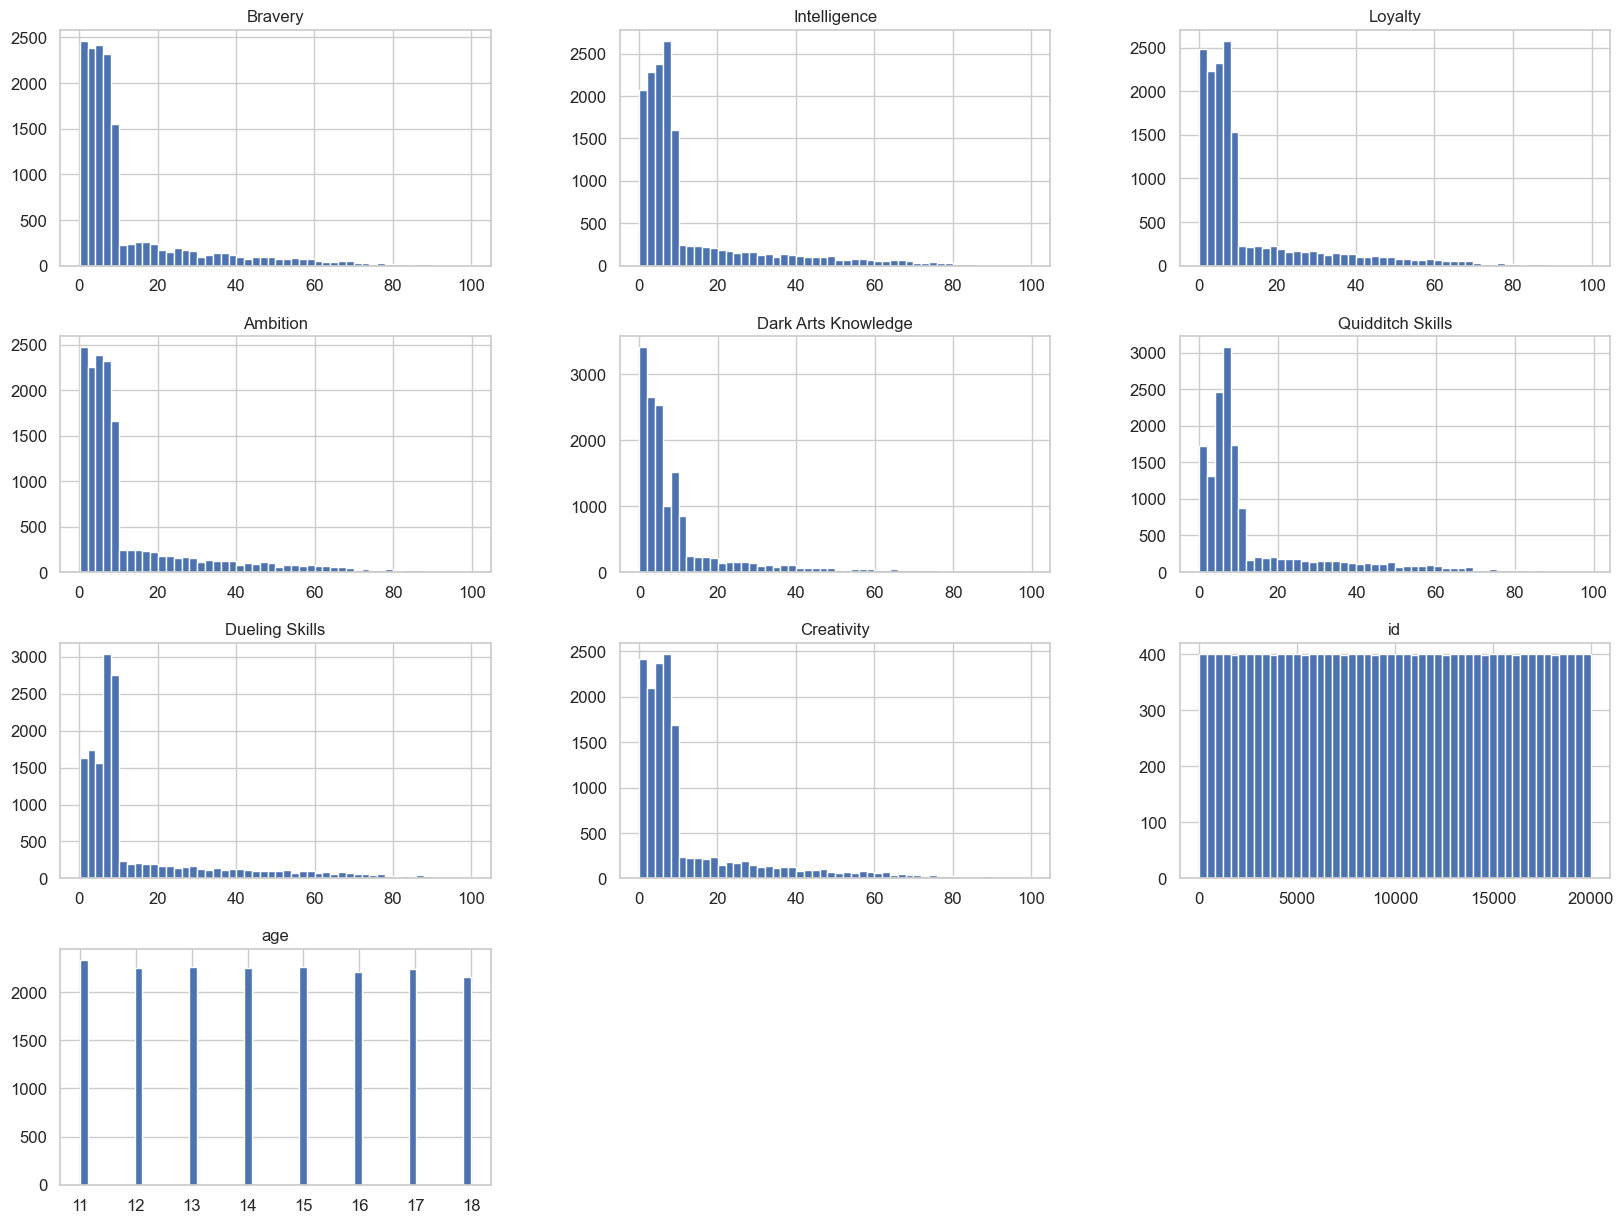

In [113]:
%matplotlib inline
import matplotlib.pyplot as plt


studenti.hist(bins=50, figsize=(20,15))
plt.show()

Alcune considerazioni:
1. Distribuzioni Asimmetriche (Right-skewed)
    La maggior parte degli attributi come Bravery, Intelligence, Loyalty, Ambition, Dark Arts Knowledge, Quidditch Skills, Dueling Skills, e Creativity mostra una distribuzione asimmetrica verso destra (right-skewed). Questo significa che:
    - La maggior parte degli individui ha punteggi molto bassi.
    - Ci sono pochi individui con punteggi elevati (oltre 40 o 60).
    - Probabilmente questi punteggi sono assegnati in modo da rendere l’eccellenza rara
2. Distribuzione dell’età
    La variabile age è uniformemente distribuita tra 11 e 18 anni, con circa lo stesso numero di individui per ogni età. Questo fa pensare a un dataset bilanciato in termini di età scolastica. Ai fini della predizione della casata non sembra essere un attributo utile, quindi si decide di eliminare la colonna.
3. Variabile ID
    La variabile id è distribuita uniformemente. Questo è atteso, poiché rappresenta identificatori univoci per ogni osservazione (studente/personaggio). Ai fini della predizione della casata non sembra essere un attributo utile, quindi si decide di eliminare la colonna.
4. Confronti tra abilità
    Dark Arts Knowledge e Dueling Skills sembrano avere code leggermente più lunghe, suggerendo che ci siano più persone con punteggi elevati in queste aree rispetto ad altre.
    Creativity e Intelligence mostrano anch’esse una coda estesa, ma con una maggiore concentrazione nei punteggi più bassi.

In [114]:
studenti = studenti.drop(['id', 'age'], axis=1)

# Creazione Test Set e Training Set


In [115]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(studenti, test_size=0.2, random_state=42)
train_set.shape, test_set.shape

((16000, 12), (4000, 12))

Dividere i dati (splitting the data) è un compito delicato e cruciale perché da esso dipende l'affidabilità del modello predittivo. Ecco perché:
1. **Evita l'overfitting**: Se alleni il modello su tutti i dati disponibili, rischi che impari troppo bene i dettagli specifici del dataset (rumore incluso), perdendo la capacità di generalizzare su dati nuovi.
2. **Valutazione onesta**: Separare i dati in **training** e **test** permette di valutare le prestazioni del modello su dati mai visti prima, simulando come si comporterà nel mondo reale.
3. **Distribuzione coerente**: Se la divisione non è fatta correttamente (es. in modo casuale ma sbilanciato), si rischia che il modello sia allenato o testato su insiemi di dati non rappresentativi, portando a risultati fuorvianti.
4. **Evitare leakage**: Una divisione scorretta può causare data leakage, cioè quando informazioni dal test set "trapelano" nel training set, gonfiando artificialmente le prestazioni del modello.


Per capire se il test set è ben costruito, andiamo a vedere le la distribuzione di tale forma simile della distribuzione del train set

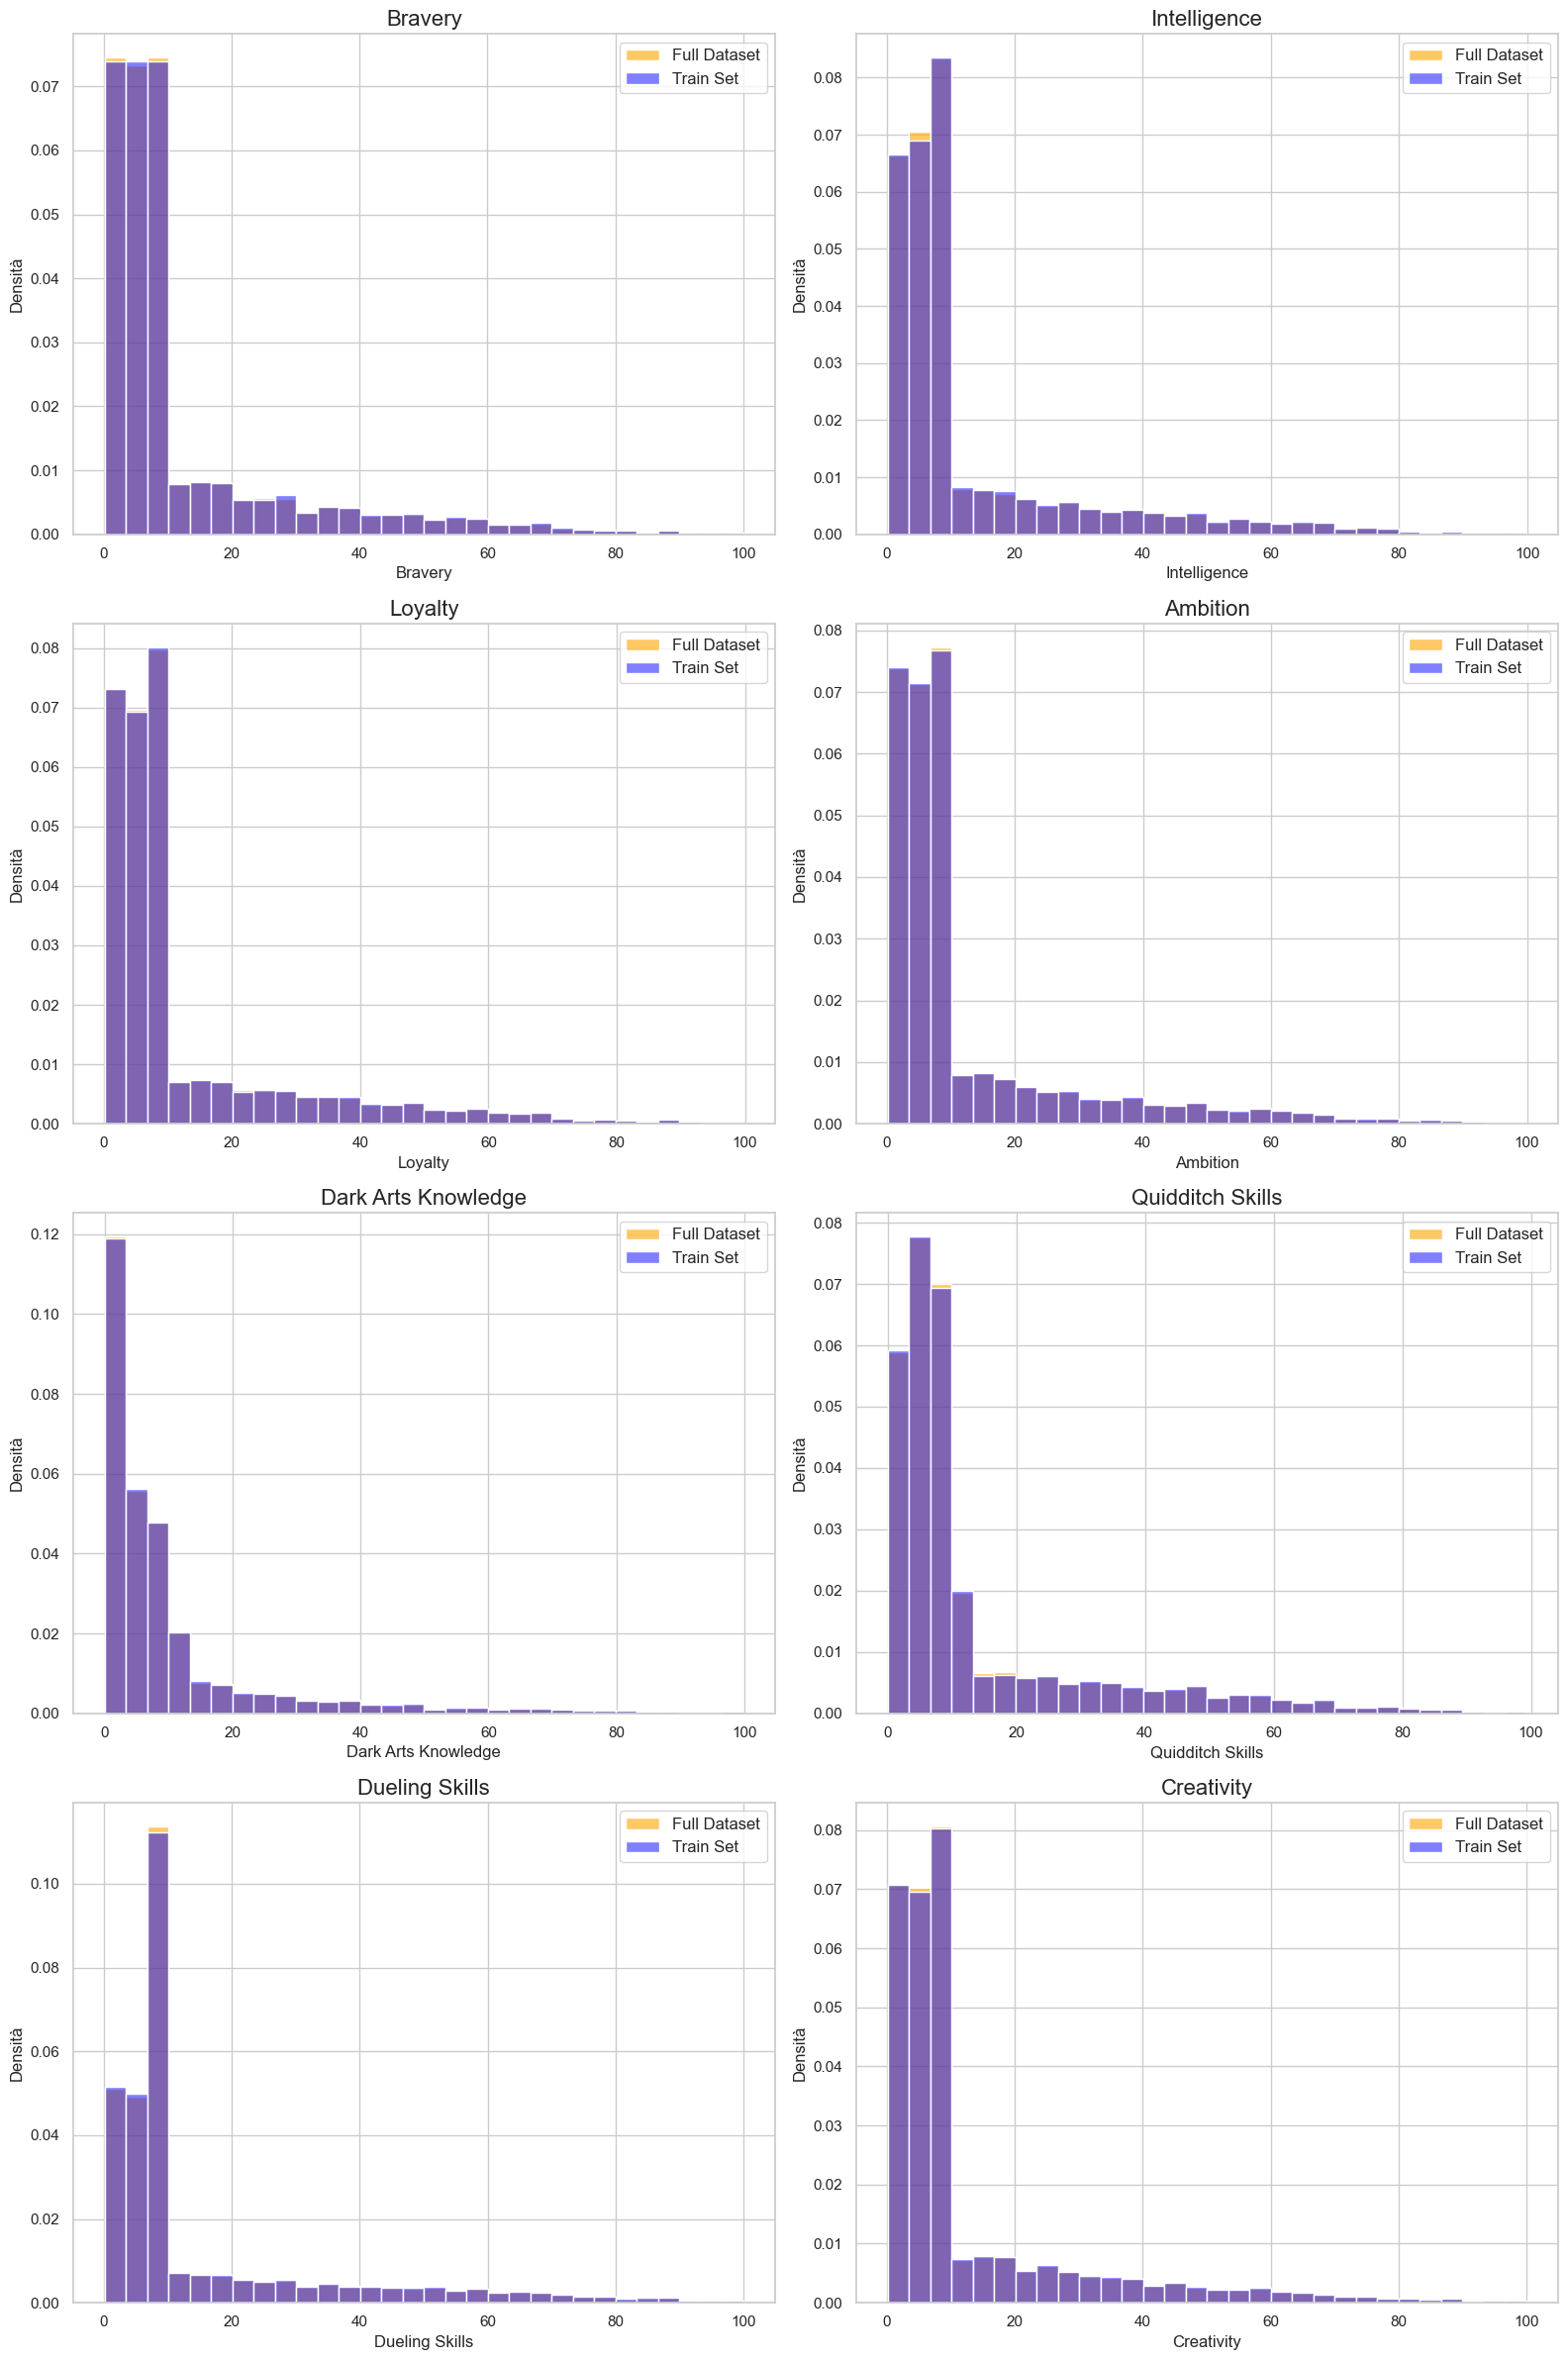

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

# Attributi da confrontare
attributes = [
    'Bravery', 'Intelligence', 'Loyalty', 'Ambition', 'Dark Arts Knowledge',
    'Quidditch Skills', 'Dueling Skills', 'Creativity'
]

# Rendiamo leggibile gli istogrammi
sns.set(style="whitegrid")
n_cols = 2
n_rows = (len(attributes) + 1) // n_cols
plt.figure(figsize=(16, n_rows * 6))

for i, attr in enumerate(attributes):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(studenti[attr], color='orange', label='Full Dataset', kde=False, stat='density', alpha=0.6, bins=30)
    sns.histplot(train_set[attr], color='blue', label='Train Set', kde=False, stat='density', alpha=0.5, bins=30)
    plt.title(attr, fontsize=16)
    plt.xlabel(attr, fontsize=12)
    plt.ylabel('Densità', fontsize=12)
    plt.legend(fontsize=12)

plt.tight_layout()
plt.show()


Le distribuzioni sembrano abbastanza equivalenti, dunque train set e test set sono ben bilanciati.

# Scoperta e Visualizzazione dei dati
Fare plotting dei dati è sicuramente i modo migliore per visualizzare e capire pattern significativi sul dataset.
E' buona norma lavorare sempre per copia dei dati, e così faremo.

In [117]:
studenti = train_set.copy()


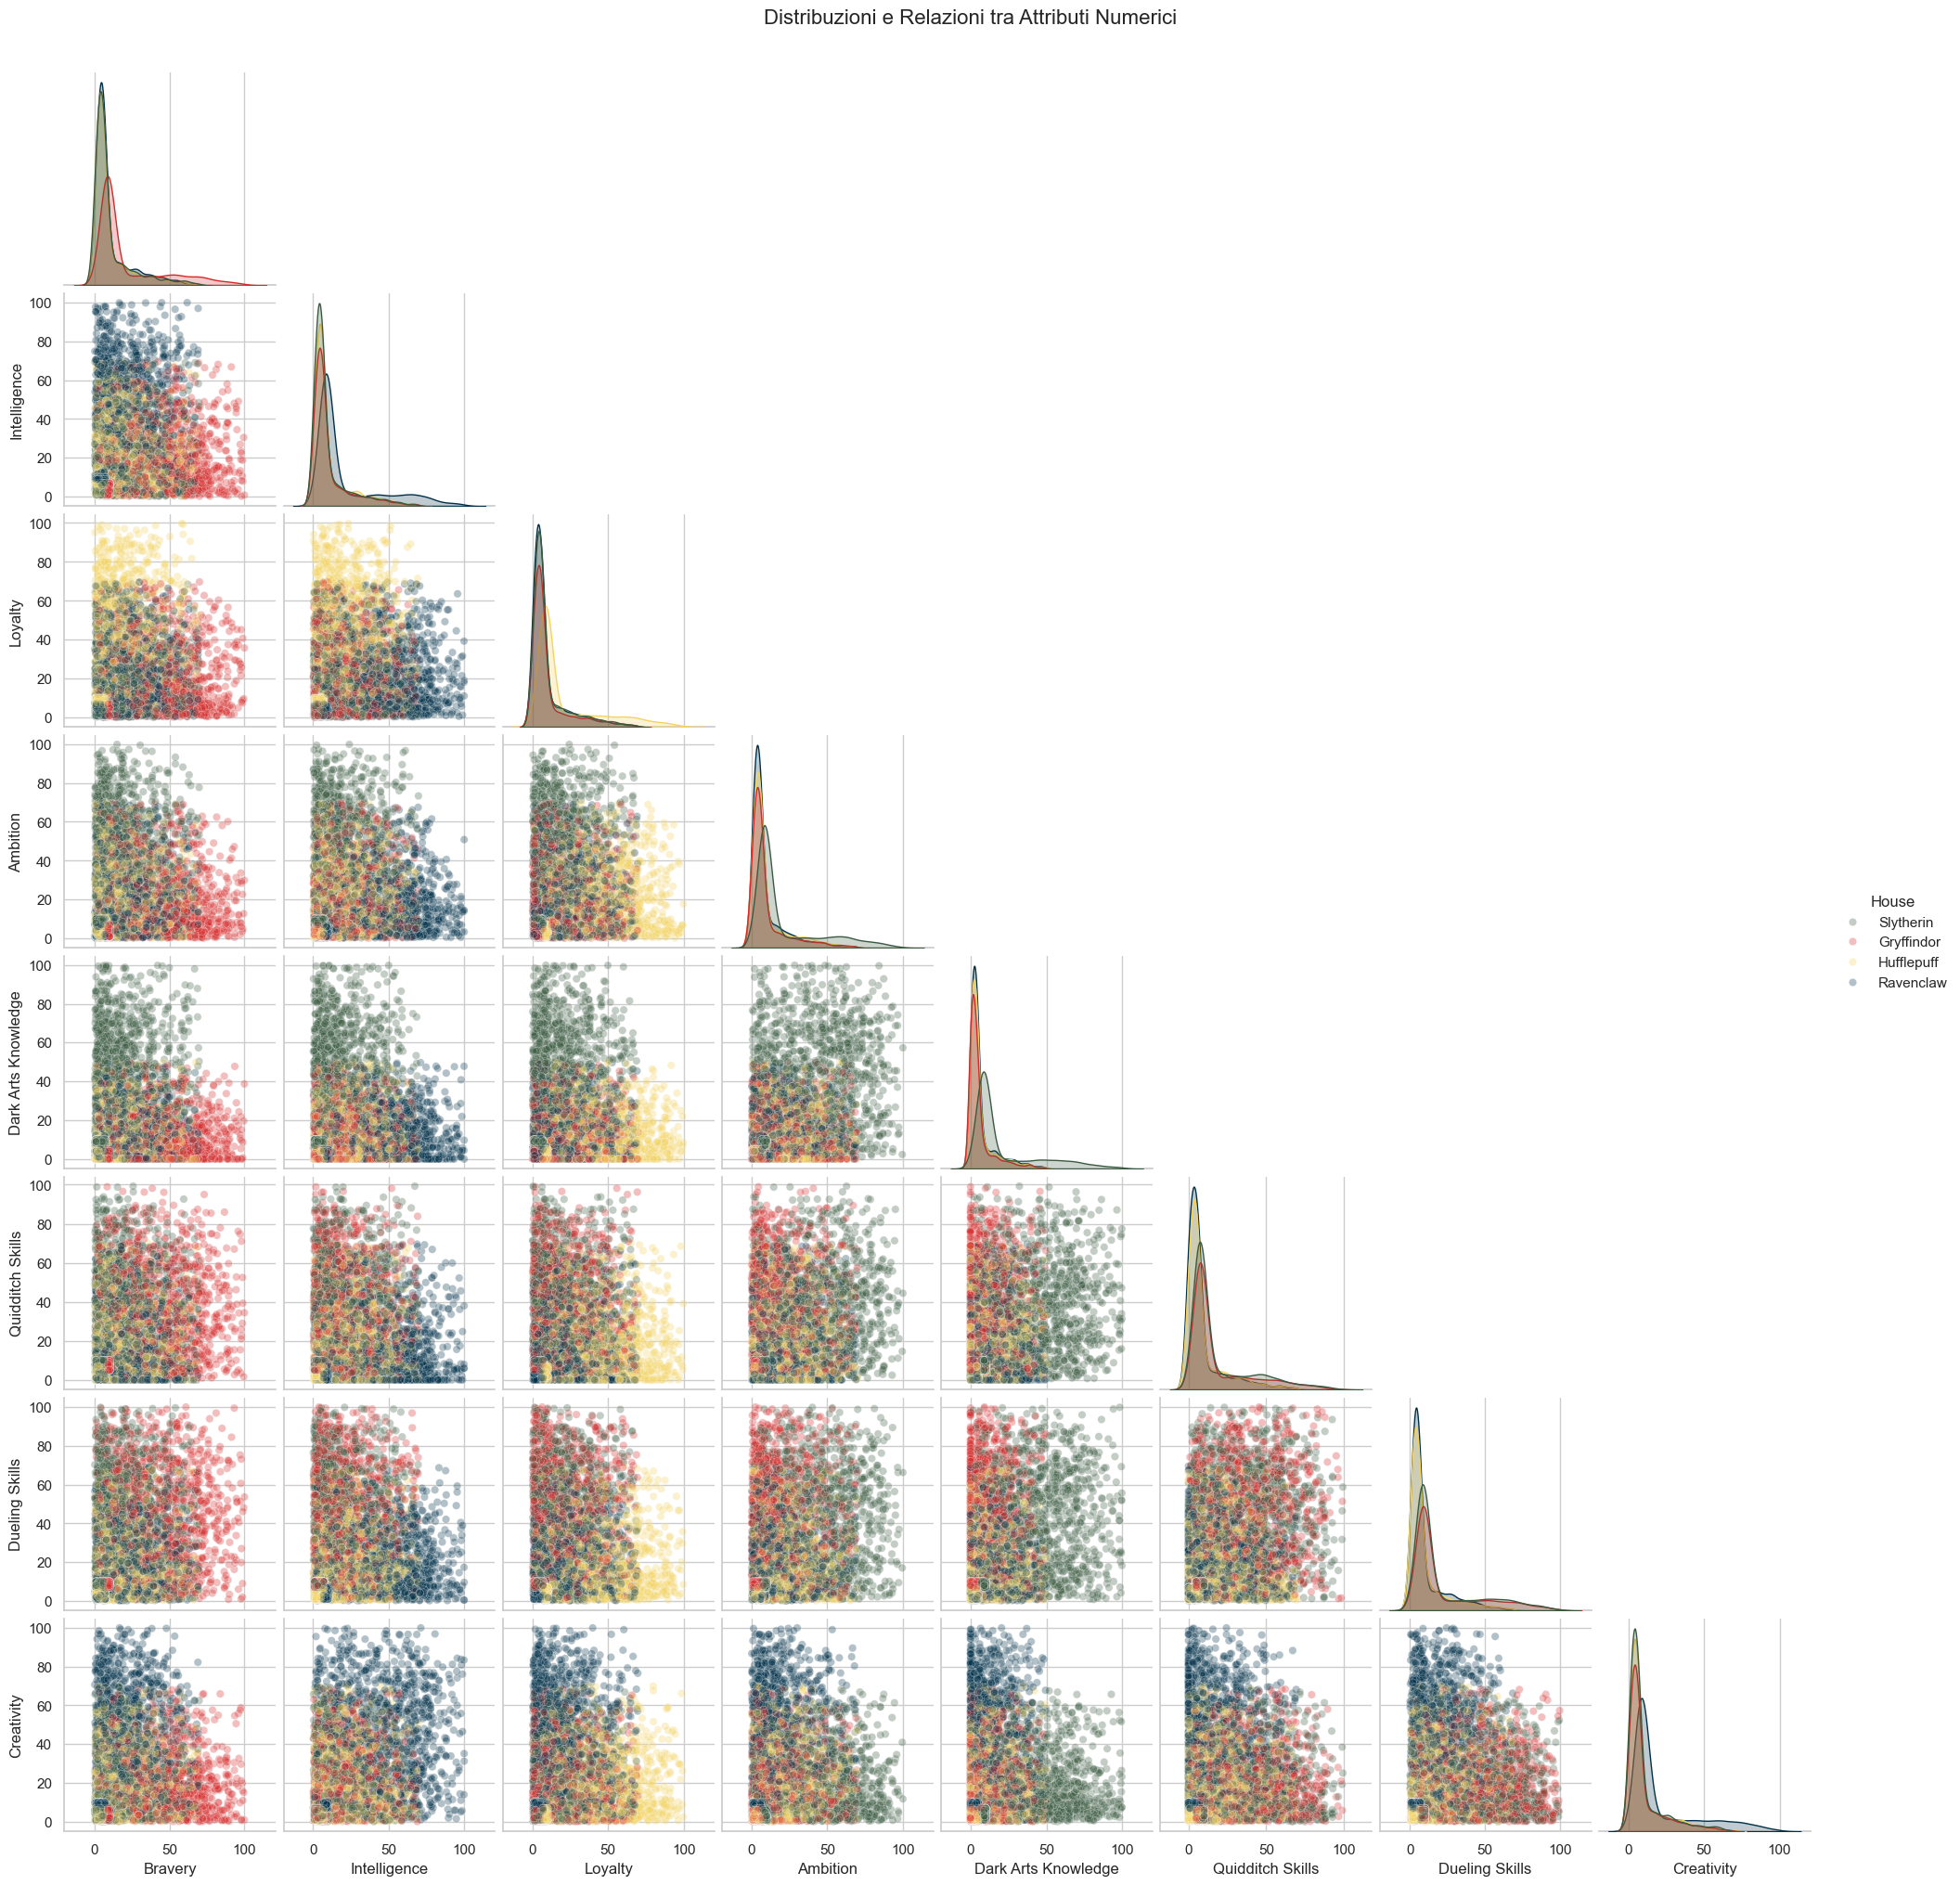

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selezione delle colonne numeriche
numerical_cols = [
    'Bravery', 'Intelligence', 'Loyalty', 'Ambition',
    'Dark Arts Knowledge', 'Quidditch Skills',
    'Dueling Skills', 'Creativity'
]

data = studenti[numerical_cols + ['House']]

# Pairplot
sns.pairplot(
    data,
    hue='House',
    palette=hue_palette,
    corner=True,
    diag_kind='kde',
    plot_kws={'alpha': 0.3})
plt.suptitle("Distribuzioni e Relazioni tra Attributi Numerici", y=1.02, fontsize=16)
plt.show()



Dall’analisi del grafico, si notano alcune relazioni interessanti tra i vari tratti numerici dei personaggi, che ci aiutano a comprendere meglio come certi aspetti del loro carattere o delle loro abilità tendano a presentarsi insieme (o al contrario, a escludersi).

### Relazioni positive – caratteristiche che tendono a crescere insieme

Una delle relazioni più evidenti è quella tra **Ambizione** e **Conoscenza delle Arti Oscure**. In altre parole, i personaggi che mostrano una forte ambizione tendono anche ad avere un livello elevato di competenza nelle Arti Oscure. Questo suggerisce un legame tra il desiderio di potere o di successo e la volontà di acquisire conoscenze meno convenzionali, forse anche rischiose.
Allo stesso modo, c’è una certa affinità tra le **abilità nel Quidditch** e le **abilità nel duello**. È come se ci fosse un nucleo comune di talento fisico o riflessi rapidi che alimenta entrambe le competenze. Chi è bravo in uno di questi campi, spesso lo è anche nell’altro.

### Relazioni negative – caratteristiche che si escludono a vicenda
Tra le relazioni inverse, spicca quella tra **Lealtà** e **Ambizione**. Questo ci dice che, in questo insieme di dati, i personaggi più leali tendono ad essere meno ambiziosi, e viceversa. È una tensione interessante: da un lato la dedizione agli altri, dall’altro il desiderio di emergere. Non è difficile immaginare come queste due tendenze possano entrare in conflitto.
Anche tra **Coraggio (Bravery)** e **Conoscenza delle Arti Oscure** si intravede una relazione negativa. Chi è più coraggioso tende ad avere meno familiarità con le Arti Oscure, come se questi due tratti rappresentassero due vie diverse per affrontare le sfide: una più morale e diretta, l’altra più calcolata o misteriosa.
Infine, si nota una certa opposizione tra **Creatività** e **Lealtà**: chi è molto creativo sembra essere meno incline a seguire le regole o a rimanere fedele a un gruppo, forse perché tende a percorrere strade più personali e originali.

Andiamo a vedere con ogni attributo influenza l'appartenenza alla casa

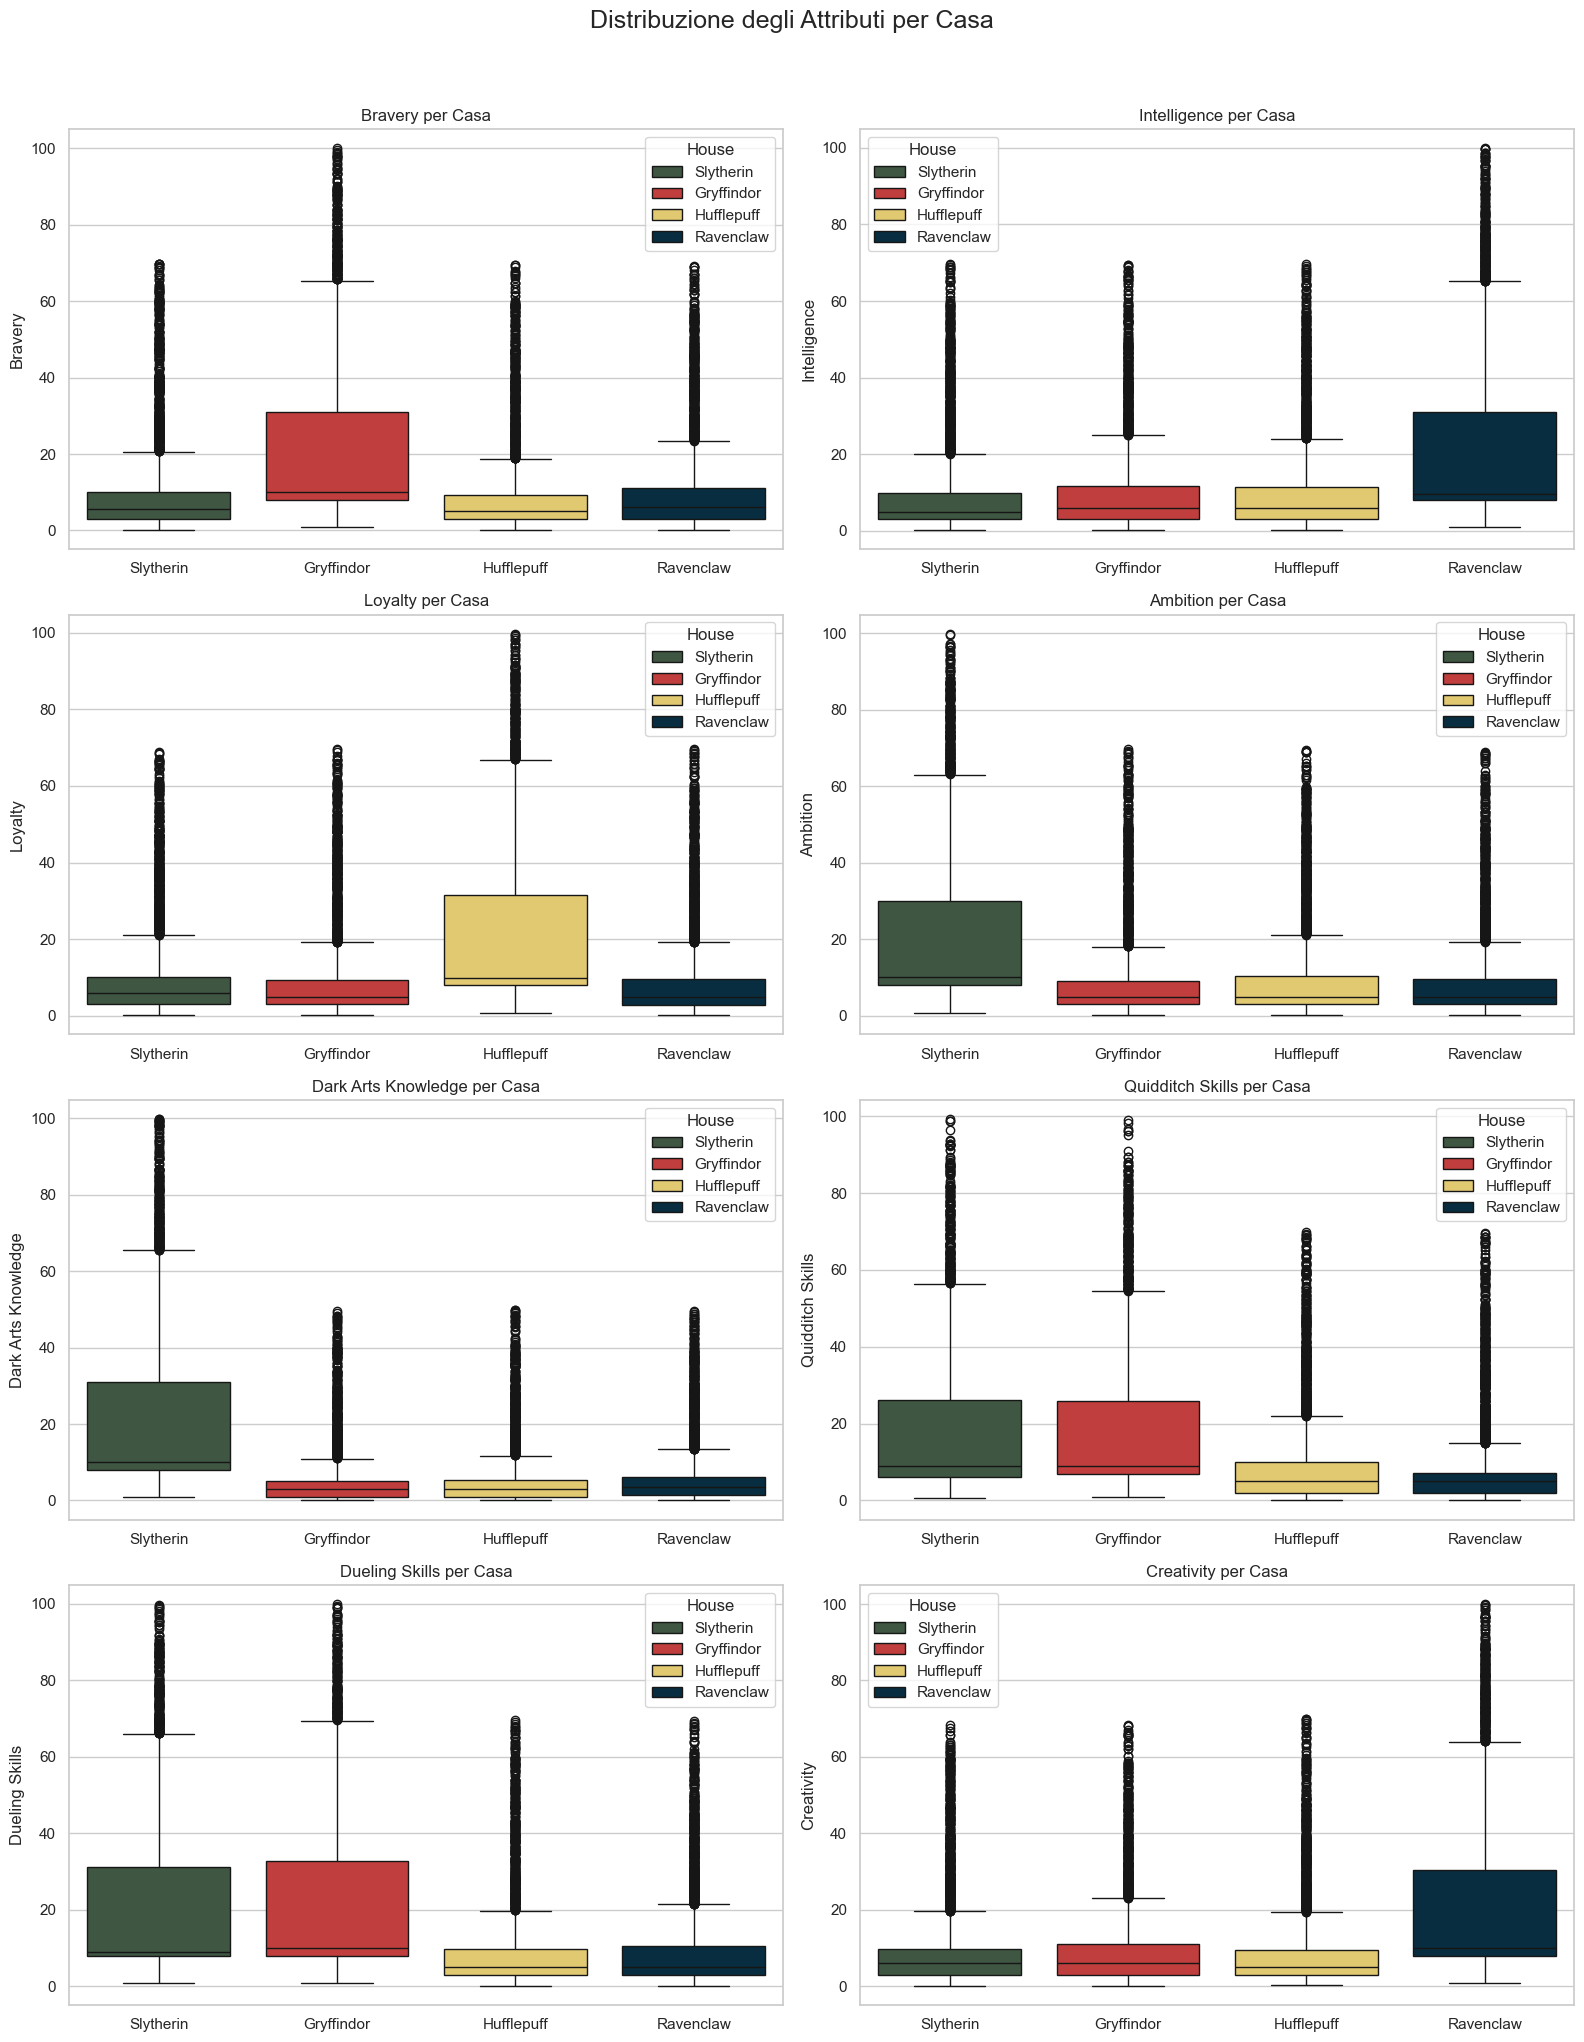

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

# Colori coerenti con il tuo pairplot
palette = hue_palette

# Imposta la griglia dei subplot
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 20))
axes = axes.flatten()

# Traccia un boxplot per ogni attributo
for i, col in enumerate(numerical_cols):
    sns.boxplot(
        data=data,
        x='House',
        y=col,
        ax=axes[i],
        hue='House',
        palette=palette
    )
    axes[i].set_title(f"{col} per Casa", fontsize=12)
    axes[i].set_xlabel("")
    axes[i].set_ylabel(col)

plt.suptitle("Distribuzione degli Attributi per Casa", fontsize=18, y=1.02)
plt.tight_layout()
plt.show()


Il boxplot consente di osservare, per ciascun attributo, come esso si distribuisca all'interno delle diverse Case, mettendo in evidenza eventuali differenze sistematiche tra i gruppi. Ogni box rappresenta l’intervallo interquartile (tra il primo e il terzo quartile), mentre la linea orizzontale all'interno del box rappresenta la mediana, ovvero il valore centrale. I punti esterni ("outlier") mostrano osservazioni che si discostano significativamente dalla distribuzione principale.

### Analisi per attributo

* **Bravery**: Gli studenti di Gryffindor mostrano una mediana sensibilmente più elevata rispetto alle altre Case, confermando il valore che tradizionalmente viene associato a questa Casa. Le altre Case presentano mediane nettamente inferiori, in particolare Slytherin e Hufflepuff.

* **Intelligence**: Gli studenti di Ravenclaw presentano valori medi significativamente più alti rispetto alle altre Case, in linea con il profilo di una Casa nota per il valore attribuito alla conoscenza e allo studio.

* **Loyalty**: Gli studenti di Hufflepuff tendono ad avere valori medi e massimi leggermente più elevati rispetto alle altre Case, riflettendo l’associazione comune tra questa Casa e la lealtà. Tuttavia, le differenze non sono così marcate.

* **Ambition**: In questo caso è la Casa di Slytherin a emergere con valori medi più elevati, coerentemente con la caratterizzazione tradizionale di questa Casa come ambiziosa e orientata al potere.

* **Dark Arts Knowledge**: Anche qui Slytherin mostra una tendenza verso valori più elevati, pur con una distribuzione ampia. Questo suggerisce una maggiore inclinazione (o familiarità) verso conoscenze meno convenzionali o più "oscure".

* **Quidditch Skills** e **Dueling Skills**: Le distribuzioni per queste due competenze sono piuttosto simili tra le Case, con una leggera prevalenza di Gryffindor e Slytherin nelle mediane, indicando forse una maggiore competitività o abilità in contesti di scontro e confronto diretto.

* **Creativity**: Ancora una volta, gli studenti di Ravenclaw tendono a presentare valori medi più elevati, coerenti con l’associazione tra creatività e intelligenza. Le altre Case mostrano valori più contenuti.

Nel complesso, i boxplot mostrano in modo chiaro come alcune caratteristiche siano fortemente associate a determinate Case, suggerendo che ogni Casa abbia un “profilo” comportamentale molto ben definito.

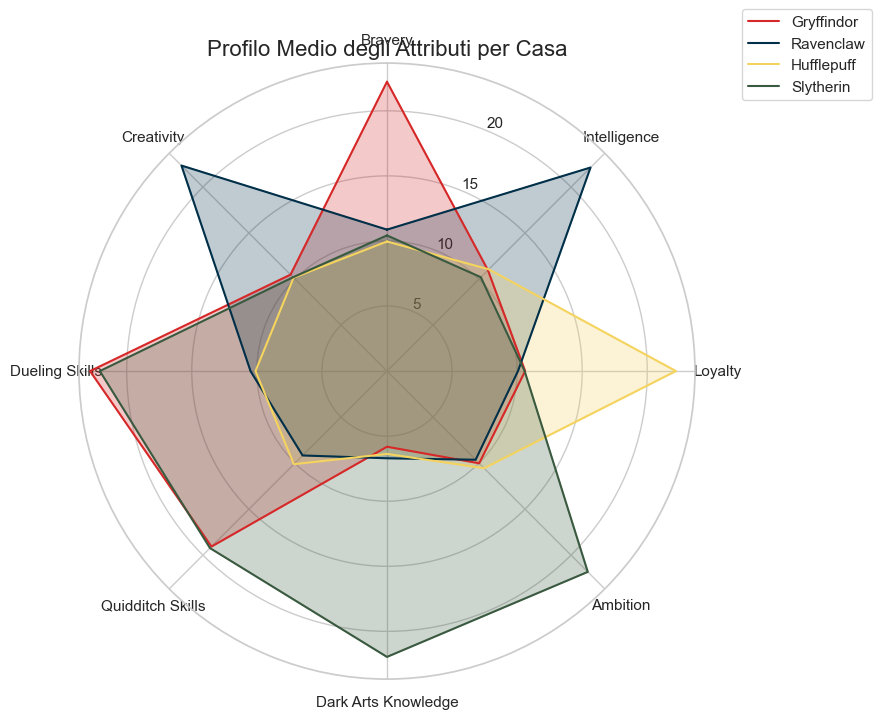

In [120]:
import numpy as np
import matplotlib.pyplot as plt

# Ordina le Case nel giusto ordine
ordered_houses = ["Gryffindor", "Ravenclaw", "Hufflepuff", "Slytherin"]

# Calcola le medie ordinate
mean_by_house = data.groupby("House")[numerical_cols].mean().loc[ordered_houses]

# Setup radar chart
labels = numerical_cols
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Disegna correttamente i colori corrispondenti
for house in ordered_houses:
    values = mean_by_house.loc[house].tolist()
    values += values[:1]
    ax.plot(angles, values, label=house, color=hue_palette[house])
    ax.fill(angles, values, alpha=0.25, color=hue_palette[house])

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)
ax.set_title("Profilo Medio degli Attributi per Casa", fontsize=16)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()


Con questo grafico, è possibile capire ancora meglio come gli attributi influenzano l'appartenenza ad una determinata casata.

### Analisi e interpretazione

* **Gryffindor**: La Casa è caratterizzata da un picco molto marcato in **Bravery**, come ci si aspetta dalla sua descrizione narrativa. Presenta anche una buona predisposizione al **Dueling**, ma risulta più contenuta su **Dark Arts Knowledge** e **Ambition**.

* **Ravenclaw**: Gli studenti di questa Casa mostrano punteggi medi molto alti in **Intelligence** e **Creativity**, suggerendo una forte propensione alla riflessione, all’originalità e alla produzione di idee innovative. Gli altri attributi risultano più equilibrati ma generalmente più bassi.

* **Hufflepuff**: Il tratto più distintivo è la **Loyalty**, che si eleva chiaramente rispetto alle altre Case. I valori negli altri attributi sono generalmente contenuti e relativamente uniformi, indicando un profilo meno polarizzato, ma coeso e costante.

* **Slytherin**: Mostra valori medi elevati in **Ambition**, **Dark Arts Knowledge** e **Quidditch Skills**, delineando un profilo orientato alla competizione, alla determinazione e talvolta a forme di conoscenza non convenzionale. Anche **Dueling Skills** è un attributo molto marcato, contribuendo all'immagine di una Casa strategica e pronta al confronto.




# Prepariamo i dati per gli algoritmi di Machine Learning

In [121]:
studenti = train_set.drop("House", axis=1) # drop labels for training set
housing_label = train_set["House"]

# Data Cleaning
Abbiamo già notato che effettivamente abbiamo di valori mancanti che dobbiamo, in qualche modo, sistemare. Decidiamo di rimpiazzare i valori mancanti tramite imputer di sklearn

In [122]:
sample_incomplete_rows = studenti[studenti.isnull().any(axis=1)].head()
sample_incomplete_rows

Blood Status  Bravery  Intelligence  Loyalty  Ambition  \
5999           NaN      NaN           NaN      NaN       NaN   
6536           NaN      NaN           NaN      NaN       NaN   
4842           NaN      NaN           NaN      NaN       NaN   
10581          NaN      NaN           NaN      NaN       NaN   
10790          NaN      NaN           8.0      NaN       NaN   

       Dark Arts Knowledge  Quidditch Skills  Dueling Skills  Creativity  \
5999                   NaN               NaN             NaN         NaN   
6536                   NaN               NaN             NaN         NaN   
4842                   NaN               NaN             NaN         NaN   
10581                  NaN               NaN             NaN         NaN   
10790                  NaN               NaN             7.0         NaN   

          name    surname  
5999   Bastian  Frostbane  
6536    Vesper     Thorne  
4842     Soren    Duskryn  
10581     Theo  Everbleed  
10790   Laziel   Hawkwind

In [123]:
try:
    from sklearn.impute import SimpleImputer # Scikit-Learn 0.20+
except ImportError:
    from sklearn.preprocessing import Imputer as SimpleImputer

imputer = SimpleImputer(strategy="median")

Ma la mediana può essere calcolara solo per gli attributi numerici, dunque:

In [124]:
studenti_num = studenti.select_dtypes(include=['int64','float64'])
studenti_num.head()

Bravery  Intelligence   Loyalty   Ambition  Dark Arts Knowledge  \
5894   6.473055     12.568707  2.280804  70.012871            44.897385   
3728   8.000000      7.000000  2.000000   6.000000             4.000000   
8958  10.000000      4.000000  3.000000   5.000000             2.000000   
7671   2.000000      5.000000  7.000000   5.000000             0.000000   
5999        NaN           NaN       NaN        NaN                  NaN   

      Quidditch Skills  Dueling Skills  Creativity  
5894         24.292561       14.928908   48.615828  
3728          6.000000        8.000000    4.000000  
8958          5.000000       10.000000    3.000000  
7671          0.000000        2.000000    2.000000  
5999               NaN             NaN         NaN

In [125]:
imputer.fit(studenti_num)

SimpleImputer(strategy='median')

In [126]:
studenti_num.median().values

array([7., 7., 7., 7., 5., 7., 8., 7.])

In [127]:
x = imputer.transform(studenti_num)
# Riconverti in DataFrame, con gli stessi nomi di colonna
import pandas as pd
studenti_num_tr = pd.DataFrame(x, columns=studenti_num.columns, index=studenti.index)

studenti.update(studenti_num_tr)

Andiamo ora a gestire ora gli attributi categorici

In [128]:
studenti_cat = studenti.select_dtypes(include=['object'])
studenti_cat.head(10)

Blood Status     name     surname
5894   Half-blood  Nerissa   Frostbane
3728   Pure-blood     Yara    Moonvale
8958  Muggle-born     Leif   Ravenscar
7671   Pure-blood   Cassia  Nightshade
5999          NaN  Bastian   Frostbane
5751  Muggle-born   Caelum   Frostbane
1688   Pure-blood  Evander    Ashcroft
6836  Muggle-born   Fenris      Thorne
6536          NaN   Vesper      Thorne
4842          NaN    Soren     Duskryn

Procediamo di One Hot Encoding perchè:
1. Neutralizza l’ordine implicito
Le variabili categoriche non hanno un ordine numerico intrinseco. Se converti queste categorie in numeri semplicemente, i modelli possono interpretare erroneamente un ordine o una distanza tra i valori. La One-Hot Encoding trasforma ogni categoria in una colonna binaria separata.
2. Compatibilità con algoritmi di machine learning
Molti modelli (come regressione lineare, alberi decisionali, reti neurali) non possono lavorare direttamente con stringhe o categorie non numeriche. La one-hot encoding fornisce una rappresentazione pura e matematica delle classi.
3. Evita assunzioni sbagliate
Attribuire numeri interi a categorie può far pensare al modello che ci siano relazioni di grandezza o proporzione tra le classi (es. che 2 sia il doppio di 1), il che non ha senso per le classi nominali.

In [129]:
try:
    from sklearn.preprocessing import OrdinalEncoder # just to raise an ImportError if Scikit-Learn < 0.20
    from sklearn.preprocessing import OneHotEncoder
except ImportError:
    from future_encoders import OneHotEncoder # Scikit-Learn < 0.20

cat_encoder = OneHotEncoder(sparse_output=False)
studenti_cat_1hot = cat_encoder.fit_transform(studenti_cat)
studenti_cat_1hot

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], shape=(16000, 86))

In [130]:
print(cat_encoder.categories_)

[array(['Half-blood', 'Muggle-born', 'Pure-blood', nan], dtype=object), array(['Alaric', 'Amara', 'Anya', 'Aurelia', 'Bastian', 'Bran', 'Caelum',
       'Caius', 'Calliope', 'Cassia', 'Dorian', 'Eira', 'Elio', 'Evander',
       'Ezra', 'Fenris', 'Freya', 'Galen', 'Ines', 'Ione', 'Isolde',
       'Jasper', 'Kai', 'Kieran', 'Laziel', 'Leif', 'Liora', 'Lucien',
       'Lyra', 'Maia', 'Minerva', 'Mirek', 'Nerissa', 'Nyx', 'Orion',
       'Oswin', 'Ronan', 'Rowan', 'Seraphina', 'Silas', 'Soren', 'Sorrel',
       'Talia', 'Thalia', 'Theo', 'Thorne', 'Vera', 'Vesper', 'Yara',
       'Zara', nan], dtype=object), array(['Ashcroft', 'Blackwood', 'Brightmoor', 'Coldmarsh', 'Darkwater',
       'Duskryn', 'Duskwatch', 'Emberlain', 'Emberwyld', 'Everbleed',
       'Falconshade', 'Flintveil', 'Frostbane', 'Graves', 'Hawkwind',
       'Ironhart', 'Moonvale', 'Nightshade', 'Ravenscar', 'Rookwood',
       'Rosenthal', 'Shadowmere', 'Starcrest', 'Stoneveil', 'Stormholt',
       'Stormrider', 'Thistledown

In [131]:
studenti.columns

Index(['Blood Status', 'Bravery', 'Intelligence', 'Loyalty', 'Ambition',
       'Dark Arts Knowledge', 'Quidditch Skills', 'Dueling Skills',
       'Creativity', 'name', 'surname'],
      dtype='object')

housing_label contine dei valori null che dobbiamo gestire al fine di istruire gli algoritmi.

Non possiamo semplicemente eliminare le righe perchè, altrimenti, avremo un problema con la dimensione del data set. Dunque si procede sostitueno i valori null tramite KNN imputer. In questo modo non andremo a sbilanciare fortemente la distribuzione delle casa (cosa che sarebbe successa se avessimo usato, ad esempio, la moda).

In [132]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

# Copia del DataFrame originale
studenti_knn = train_set

In [133]:

# 1. Label Encoding delle case (temporaneo solo per imputazione)
le = LabelEncoder()
studenti_knn['House_encoded'] = studenti_knn['House']
mask_null = studenti_knn['House'].isnull()

# Solo i non-null per fit di LabelEncoder
studenti_knn.loc[~mask_null, 'House_encoded'] = le.fit_transform(studenti_knn.loc[~mask_null, 'House'])

In [134]:

# 2. Conversione in float (KNNImputer lavora con float)
studenti_knn['House_encoded'] = pd.to_numeric(studenti_knn['House_encoded'], errors='coerce')

In [135]:

# 3. Aggiungi `House_encoded` alle colonne numeriche da usare per l’imputazione
cols_for_imputation = numerical_cols + ['House_encoded']

In [136]:

# 4. Applica KNNImputer
imputer = KNNImputer(n_neighbors=5)
imputed_array = imputer.fit_transform(studenti_knn[cols_for_imputation])

In [137]:

# 5. Recupera la colonna imputata e sostituiscila (con valori arrotondati e convertiti in label)
house_encoded_imputed = imputed_array[:, -1].round().astype(int)
studenti_knn['House_imputed'] = le.inverse_transform(house_encoded_imputed)

In [138]:

# 6. Sostituisci solo i valori mancanti
train_set['House'] = train_set['House'].combine_first(studenti_knn['House_imputed'])

housing_labels = train_set['House']


# Feature Scaling

La scelta del **Robust Scaling** per normalizzare i dati del dataset si basa su una considerazione fondamentale: la presenza significativa di outlier nelle variabili numeriche.

Il `RobustScaler` di scikit-learn normalizza i dati centrandoli sulla mediana e scalandoli tramite l’intervallo interquartile (IQR), ovvero la differenza tra il 75° e il 25° percentile. Questo significa che:
La mediana diventa lo "zero" della scala. I valori vengono "compressi" rispetto alla dispersione centrale dei dati, ignorando gli estremi.

In [139]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaled_data = scaler.fit_transform(studenti[attributes])
studenti.describe()

Bravery  Intelligence       Loyalty      Ambition  \
count  16000.000000  16000.000000  16000.000000  16000.000000   
mean      11.317671     11.855741     11.526550     11.358749   
std       14.503714     15.069076     14.741696     14.578337   
min        0.113545      0.174546      0.162992      0.113689   
25%        5.000000      5.000000      5.000000      5.000000   
50%        7.000000      7.000000      7.000000      7.000000   
75%        9.000000      9.000000      9.000000      9.000000   
max       99.993802     99.847951     99.722977     99.881474   

       Dark Arts Knowledge  Quidditch Skills  Dueling Skills    Creativity  
count         16000.000000      16000.000000    16000.000000  16000.000000  
mean              8.868847         12.185249       13.823649     11.611605  
std              13.517415         15.544490       17.130240     14.904157  
min               0.000000          0.000000        0.122784      0.120405  
25%               3.000000          5.000000        6.361663      5.000000  
50%               5.000000          7.000000        8.000000      7.000000  
75%               8.000000          9.000000       10.000000      9.000000  
max              99.838167         99.262810       99.927337     99.941068

# Transformation Pipelines
L'uso di una Transformation Pipeline è oggi una best practice fondamentale nel preprocessing e nell'addestramento dei modelli. Ti consente di:
- mantenere coerenza tra fasi di training e testing
- automatizzare i passaggi in maniera ordinata
- proteggere il modello da errori comuni, come il data leakage
- facilitare l’integrazione futura del tuo lavoro in ambienti di produzione o in applicazioni reali

In [140]:
# Selezione delle colonne numeriche
studenti_num = studenti.select_dtypes(include=['int64', 'float64'])

# Importazione dello scaler robusto
from sklearn.preprocessing import RobustScaler

# Creazione e applicazione dello scaler
scaler = RobustScaler()
studenti_num_scaled = scaler.fit_transform(studenti_num)


gestiamo ora quelli che erano gli attributi categorici: abbiamo ancora dei valori null, dunque riscriviamo un algoritmo Imputer che fa affidamento al parametro "most_frequent", scaliamo i dati e prepariamo il nostro test set

In [141]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# 1. Seleziono le colonne
num_attribs = studenti.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_attribs = studenti.select_dtypes(include=['object']).columns.tolist()

# 2. Pipeline solo per le colonne categoriche perchè quelle numeriche sono già state gestite
cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(sparse_output=False))
])

# 3. ColumnTransformer che lascia intatti i numerici
full_pipeline = ColumnTransformer([
    ("cat", cat_pipeline, cat_attribs)
], remainder='passthrough')  # 'passthrough' lascia invariate le altre colonne

# 4. Applica il pipeline
studenti_prepared = full_pipeline.fit_transform(studenti)

# 5. Ricostruzione dei nomi delle colonne
cat_feature_names = full_pipeline.named_transformers_["cat"]\
    .named_steps["encoder"].get_feature_names_out(cat_attribs)

# Il resto delle colonne (numeriche)
num_feature_names = num_attribs

# Riordina: `ColumnTransformer` mette prima i risultati del transformer, poi i 'passthrough'
all_feature_names = list(cat_feature_names) + num_feature_names

# 6. Conversione in DataFrame finale
studenti_prepared_df = pd.DataFrame(studenti_prepared, columns=all_feature_names, index=studenti.index)

# Visualizza struttura
studenti_prepared_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16000 entries, 5894 to 15795
Data columns (total 91 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Blood Status_Half-blood   16000 non-null  float64
 1   Blood Status_Muggle-born  16000 non-null  float64
 2   Blood Status_Pure-blood   16000 non-null  float64
 3   name_Alaric               16000 non-null  float64
 4   name_Amara                16000 non-null  float64
 5   name_Anya                 16000 non-null  float64
 6   name_Aurelia              16000 non-null  float64
 7   name_Bastian              16000 non-null  float64
 8   name_Bran                 16000 non-null  float64
 9   name_Caelum               16000 non-null  float64
 10  name_Caius                16000 non-null  float64
 11  name_Calliope             16000 non-null  float64
 12  name_Cassia               16000 non-null  float64
 13  name_Dorian               16000 non-null  float64
 14  name_Eir

ora che il nostro train set è finalmente pronto, possiamo andare ad allenare il modelli

# Selezione e Allenamento dei modelli

Per questo progetto si è pensato di addestrare diversi modelli di classificazione e clustering

In [142]:
X = studenti_prepared_df  # tutte le colonne tranne il target
y = housing_labels                         # target: Casa


## Classificazione
Per quanto riguara la classificazione, vengono scelti 3 algoritmi:
* Random Forest
* Support Vector Machine
* K-Nearest Neighbors


### Random Forest
Random Forest è un algoritmo di apprendimento supervisionato basato su un insieme di alberi decisionali ("forest"). Ogni albero è addestrato su un sottoinsieme casuale dei dati e delle feature. Il risultato finale è ottenuto tramite voto di maggioranza (per classificazione) o media (per regressione).

In [143]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


In [144]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred_rf = clf.predict(X_test)


In [145]:
print("Random Forest")
print("Report:\n", classification_report(y_test, y_pred_rf))


Random Forest
Report:
               precision    recall  f1-score   support

  Gryffindor       0.83      0.83      0.83       563
  Hufflepuff       0.83      0.85      0.84       796
   Ravenclaw       0.87      0.90      0.88      1169
   Slytherin       0.90      0.85      0.87       672

    accuracy                           0.86      3200
   macro avg       0.86      0.85      0.86      3200
weighted avg       0.86      0.86      0.86      3200



Il primo modello ha ottenuto una accuratezza complessiva dell’86.2%, dimostrando un buon livello di generalizzazione sulla totalità del dataset di test. L’analisi delle metriche per ciascuna classe evidenzia:

* **Ravenclaw** è la casa meglio classificata, con:

  * *Precisione*: 0.87
  * *Recall*: 0.90
  * *F1-score*: 0.88

* **Slytherin** mostra anch’essa elevate prestazioni:

  * *Precisione*: 0.90
  * *Recall*: 0.85

* Le performance per **Gryffindor** e **Hufflepuff** sono simili tra loro, con f1-score intorno a 0.83–0.84.

Le medie **macro** e **pesate (weighted)** delle metriche principali confermano una buona distribuzione dell'efficacia tra le classi:

* *F1-score medio pesato*: 0.86

### Support Vector Machine
SVM è un algoritmo supervisato che trova l’iperpiano ottimale che separa le classi con il massimo margine. Utilizza kernel (lineare, polinomiale, RBF, ecc.) per gestire separazioni non lineari.

In [146]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', C=1, gamma='scale')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print("Support Vector Machine")
print(classification_report(y_test, y_pred_svm))


Support Vector Machine
              precision    recall  f1-score   support

  Gryffindor       0.81      0.77      0.79       563
  Hufflepuff       0.85      0.62      0.71       796
   Ravenclaw       0.73      0.92      0.81      1169
   Slytherin       0.90      0.81      0.85       672

    accuracy                           0.80      3200
   macro avg       0.82      0.78      0.79      3200
weighted avg       0.81      0.80      0.79      3200



Il secondo classificatore, basato su **Support Vector Machine**, ha ottenuto una **accuratezza complessiva dell’80.0%**, inferiore rispetto al primo modello. L’analisi per singola classe rivela una maggiore disomogeneità nelle performance:

* **Ravenclaw** ha una **recall molto alta (0.92)**, segnalando che il modello è molto efficace nell’identificare correttamente gli studenti di questa casa.
* Tuttavia, **Hufflepuff** soffre di un *recall* basso (0.62), indicando molte classificazioni errate o mancate.
* **Slytherin** mantiene buoni valori di precisione (0.90) e f1-score (0.85), dimostrando una classificazione solida.

Il confronto delle medie mostra:

* *Macro avg f1-score*: 0.79
* *Weighted avg f1-score*: 0.79

Tali valori evidenziano una **prestazione non bilanciata** tra le classi, probabilmente causata da uno sbilanciamento nei dati o da una sensibilità eccessiva del modello a caratteristiche specifiche.


### K-Nearest Neighbors
KNN è un algoritmo supervisato basato sulla distanza: un punto viene classificato in base alla maggioranza dei suoi k vicini più prossimi.

In [147]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=5)  # puoi modificare il valore di k
knn_clf.fit(X_train, y_train)

y_pred_knn = knn_clf.predict(X_test)

print("Support Vector Machine")
print(classification_report(y_test, y_pred_knn))


Support Vector Machine
              precision    recall  f1-score   support

  Gryffindor       0.79      0.83      0.81       563
  Hufflepuff       0.81      0.81      0.81       796
   Ravenclaw       0.84      0.89      0.87      1169
   Slytherin       0.93      0.80      0.86       672

    accuracy                           0.84      3200
   macro avg       0.85      0.83      0.84      3200
weighted avg       0.85      0.84      0.84      3200



Un terzo esperimento con KNN, ha condotto a un miglioramento significativo:

* **Accuratezza complessiva**: 84.0%
* Tutte le case mostrano ora **f1-score bilanciati** tra 0.81 e 0.87
* **Slytherin** si distingue per la precisione più elevata (0.93), mentre **Ravenclaw** continua ad avere una **recall elevata (0.89)**

Le medie riportano:

* *Macro avg f1-score*: 0.84
* *Weighted avg f1-score*: 0.84

Questo suggerisce che il modello ha raggiunto un **compromesso più equilibrato** tra accuratezza globale e qualità della classificazione per ciascuna classe.

### Confronto fra gli algoritmi

#### Confusion Matrix

In [148]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

<Figure size 600x500 with 0 Axes>

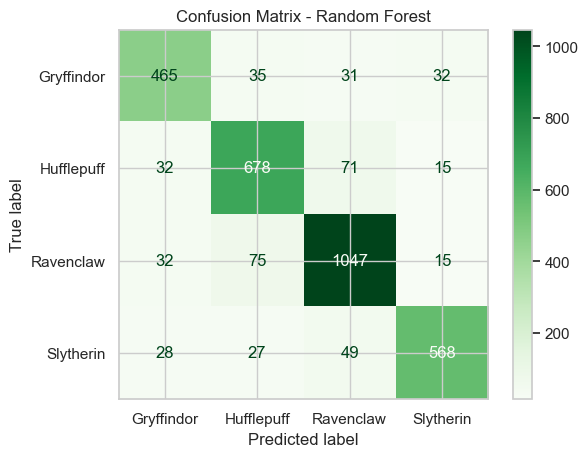

Accuracy RF: 0.861875


In [149]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=le.classes_)
plt.figure(figsize=(6, 5))
disp_rf.plot(cmap="Greens", values_format='d')
plt.title("Confusion Matrix - Random Forest")
plt.show()

print("Accuracy RF:", accuracy_score(y_test, y_pred_rf))


<Figure size 600x500 with 0 Axes>

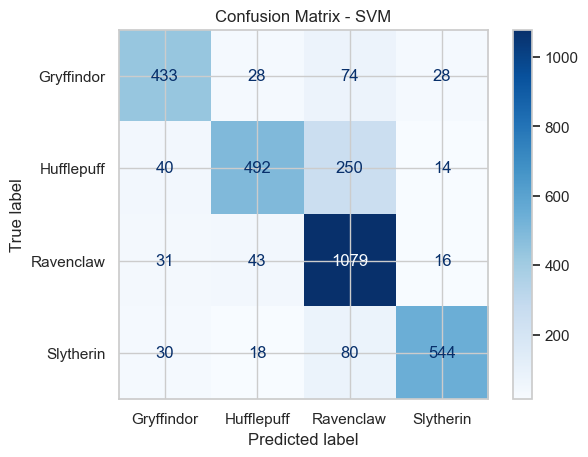

Accuracy SVM: 0.79625


In [150]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=le.classes_)

plt.figure(figsize=(6, 5))
disp_svm.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix - SVM")
plt.show()

print("Accuracy SVM:", accuracy_score(y_test, y_pred_svm))

<Figure size 600x500 with 0 Axes>

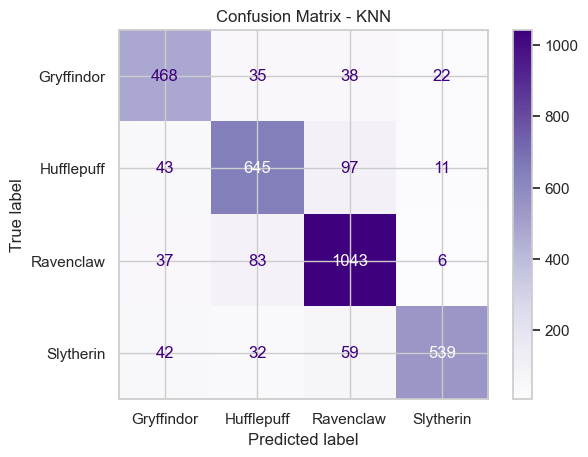

Accuracy KNN: 0.8421875


In [151]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=le.classes_)

plt.figure(figsize=(6, 5))
disp_knn.plot(cmap="Purples", values_format='d')
plt.title("Confusion Matrix - KNN")
plt.show()

print("Accuracy KNN:", accuracy_score(y_test, y_pred_knn))


### **Conclusione Comparativa**

| Modello       | Accuracy  | Macro F1-score | Weighted F1-score | Note principali         |
|---------------| --------- | -------------- | ----------------- | ----------------------- |
| Random Forest | **0.862** | 0.86           | **0.86**          | Ottimo bilanciamento    |
| SVM           | 0.800     | 0.79           | 0.79              | Problemi con Hufflepuff |
| KNN           | 0.840     | 0.84           | 0.84              | Miglior equilibrio      |



Ma quali sono risultati essere gli attributi più discriminanti?


C:\Users\vogli\AppData\Local\Temp\ipykernel_7104\1041662215.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_importances, y=top_features, palette=palette)


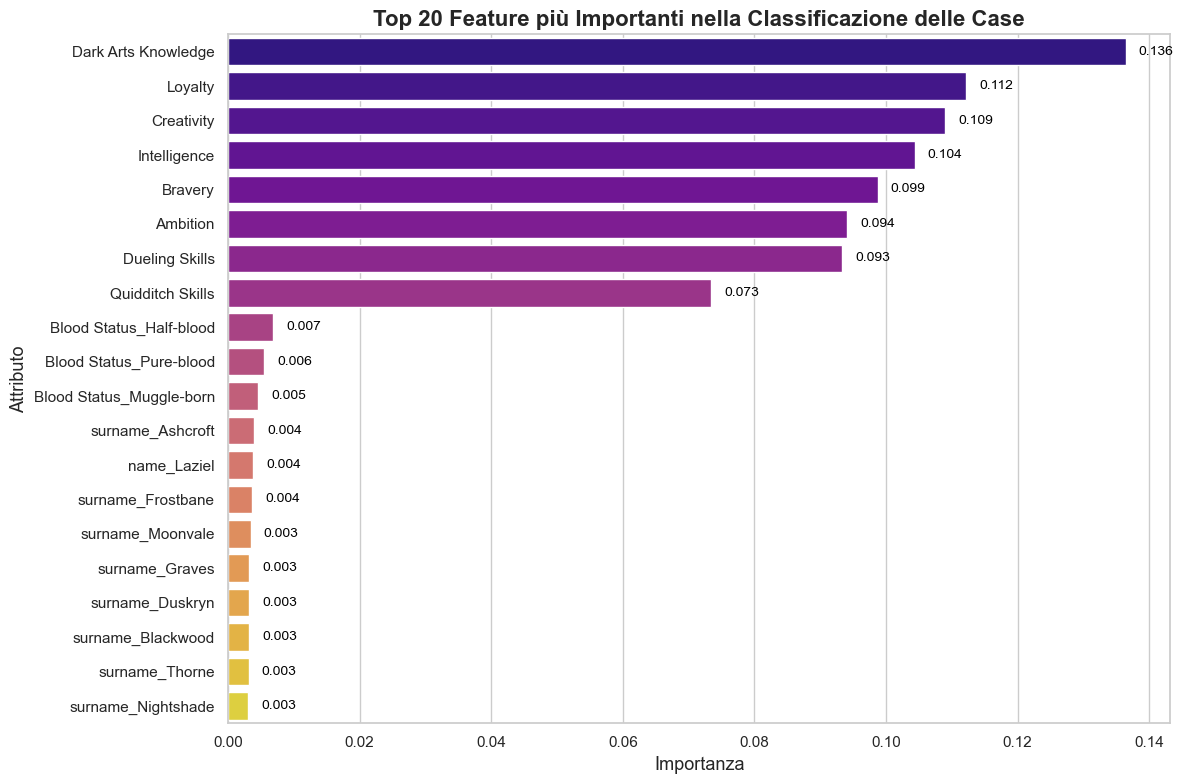

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calcolo e ordinamento
importances = clf.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

# Selezione top N
top_n = 20
top_features = features[indices][:top_n]
top_importances = importances[indices][:top_n]

# Visualizzazione migliorata
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
palette = sns.color_palette("plasma", top_n)

sns.barplot(x=top_importances, y=top_features, palette=palette)

plt.title("Top 20 Feature più Importanti nella Classificazione delle Case", fontsize=16, fontweight='bold')
plt.xlabel("Importanza", fontsize=13)
plt.ylabel("Attributo", fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Etichette valori
for i, v in enumerate(top_importances):
    plt.text(v + 0.002, i, f"{v:.3f}", va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()



Il grafico mostra l'importanza relativa di 20 attributi più significativi nel predire la Casa di appartenenza degli studenti. Si osserva quanto ogni attributo abbia contribuito alla decisione del modello.

* Le **feature più influenti** sono in cima, tra cui:
  * `Dark Arts Knowledge`
  * `Creativity`
  * `Intelligence`
  * `Dueling Skills`
  * `Blood Status`
* Gli attributi come `surname_`, `name_`, ecc. compaiono in grande quantità con valori di importanza estremamente bassi. Ciò suggerisce che queste variabili nominali sparse abbiano scarso contributo predittivo individuale.

### Tuning dei paramentri
Il **tuning dei parametri** (o ottimizzazione degli iperparametri) è una fase cruciale nello sviluppo di modelli di machine learning. Consiste nella selezione delle configurazioni ottimali per gli iperparametri, che sono variabili esterne al modello stesso e determinano il comportamento dell'algoritmo durante l'addestramento.

A differenza dei parametri interni del modello, che vengono appresi automaticamente dai dati durante il processo di training, gli iperparametri devono essere impostati manualmente prima dell'addestramento.

Una scelta accurata degli iperparametri è fondamentale per migliorare le prestazioni del modello e garantire una buona generalizzazione sui dati non visti. Tecniche comuni per il tuning includono la ricerca a griglia (grid search), la ricerca casuale (random search) e l'ottimizzazione bayesiana. Queste metodologie permettono di esplorare lo spazio degli iperparametri e identificare le combinazioni che massimizzano metriche di valutazione come l'accuratezza o il Silhouette Score.

Procediamo dunque ad eseguire tali operazioni per ogni algoritmo visto, ad esclusione di DBSCAN perchè è stato già fatto implicitamente



In [153]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

#### Random Forest

In [154]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Parametri più mirati per Random Forest
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}

rf_clf = RandomForestClassifier(random_state=42)
random_rf = RandomizedSearchCV(
    rf_clf,
    rf_params,
    n_iter=5,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)
random_rf.fit(X_train, y_train)
best_rf = random_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
print("Random Forest - Migliori Parametri:", random_rf.best_params_)
print(classification_report(y_test, y_pred_rf))

Random Forest - Migliori Parametri: {'n_estimators': 200, 'min_samples_split': 2, 'max_depth': 20}
              precision    recall  f1-score   support

  Gryffindor       0.84      0.81      0.83       563
  Hufflepuff       0.85      0.80      0.82       796
   Ravenclaw       0.84      0.92      0.88      1169
   Slytherin       0.91      0.84      0.87       672

    accuracy                           0.85      3200
   macro avg       0.86      0.84      0.85      3200
weighted avg       0.85      0.85      0.85      3200



#### Support Vector Machine

In [155]:
# Parametri più mirati per SVM
svm_params = {
    'C': [1, 10],
    'gamma': ['scale'],
    'kernel': ['rbf']
}

svm_model = SVC()
random_svm = RandomizedSearchCV(
    svm_model,
    svm_params,
    n_iter=3,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)
random_svm.fit(X_train, y_train)
best_svm = random_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test)
print("SVM - Migliori Parametri:", random_svm.best_params_)
print(classification_report(y_test, y_pred_svm))

C:\Users\vogli\miniconda3\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 2 is smaller than n_iter=3. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


SVM - Migliori Parametri: {'kernel': 'rbf', 'gamma': 'scale', 'C': 10}
              precision    recall  f1-score   support

  Gryffindor       0.80      0.78      0.79       563
  Hufflepuff       0.81      0.66      0.73       796
   Ravenclaw       0.76      0.91      0.83      1169
   Slytherin       0.91      0.81      0.85       672

    accuracy                           0.80      3200
   macro avg       0.82      0.79      0.80      3200
weighted avg       0.81      0.80      0.80      3200



#### K-Nearest Neighbors

In [156]:
knn_params = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean']
}

knn_clf = KNeighborsClassifier()
random_knn = RandomizedSearchCV(
    knn_clf,
    knn_params,
    n_iter=4,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)
random_knn.fit(X_train, y_train)
best_knn = random_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test)
print("KNN - Migliori Parametri:", random_knn.best_params_)
print(classification_report(y_test, y_pred_knn))

KNN - Migliori Parametri: {'weights': 'uniform', 'n_neighbors': 5, 'metric': 'euclidean'}
              precision    recall  f1-score   support

  Gryffindor       0.79      0.83      0.81       563
  Hufflepuff       0.81      0.81      0.81       796
   Ravenclaw       0.84      0.89      0.87      1169
   Slytherin       0.93      0.80      0.86       672

    accuracy                           0.84      3200
   macro avg       0.85      0.83      0.84      3200
weighted avg       0.85      0.84      0.84      3200



#### Confronto delle Performance Pre e Post Tuning

In [157]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Definiamo una funzione per calcolare tutte le metriche
def get_metrics(y_true, y_pred):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, average='weighted'),
        'Recall': recall_score(y_true, y_pred, average='weighted'),
        'F1-Score': f1_score(y_true, y_pred, average='weighted')
    }


In [158]:
# Creazione DataFrame per i risultati
rf_clf.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
knn_clf.fit(X_train, y_train)


results_df = pd.DataFrame({
    'Metrica': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'RF Pre-Tuning': [accuracy_score(y_test, rf_clf.predict(X_test)),
                      precision_score(y_test, rf_clf.predict(X_test), average='weighted'),
                      recall_score(y_test, rf_clf.predict(X_test), average='weighted'),
                      f1_score(y_test, rf_clf.predict(X_test), average='weighted')],
    'RF Post-Tuning': [accuracy_score(y_test, best_rf.predict(X_test)),
                       precision_score(y_test, best_rf.predict(X_test), average='weighted'),
                       recall_score(y_test, best_rf.predict(X_test), average='weighted'),
                       f1_score(y_test, best_rf.predict(X_test), average='weighted')],
    'SVM Pre-Tuning': [accuracy_score(y_test, svm_model.predict(X_test)),
                       precision_score(y_test, svm_model.predict(X_test), average='weighted'),
                       recall_score(y_test, svm_model.predict(X_test), average='weighted'),
                       f1_score(y_test, svm_model.predict(X_test), average='weighted')],
    'SVM Post-Tuning': [accuracy_score(y_test, best_svm.predict(X_test)),
                        precision_score(y_test, best_svm.predict(X_test), average='weighted'),
                        recall_score(y_test, best_svm.predict(X_test), average='weighted'),
                        f1_score(y_test, best_svm.predict(X_test), average='weighted')],
    'KNN Pre-Tuning': [accuracy_score(y_test, knn_clf.predict(X_test)),
                       precision_score(y_test, knn_clf.predict(X_test), average='weighted'),
                       recall_score(y_test, knn_clf.predict(X_test), average='weighted'),
                       f1_score(y_test, knn_clf.predict(X_test), average='weighted')],
    'KNN Post-Tuning': [accuracy_score(y_test, best_knn.predict(X_test)),
                        precision_score(y_test, best_knn.predict(X_test), average='weighted'),
                        recall_score(y_test, best_knn.predict(X_test), average='weighted'),
                        f1_score(y_test, best_knn.predict(X_test), average='weighted')]
})

## Visualizzazione e confronto delle metriche



Confronto delle metriche pre e post tuning:


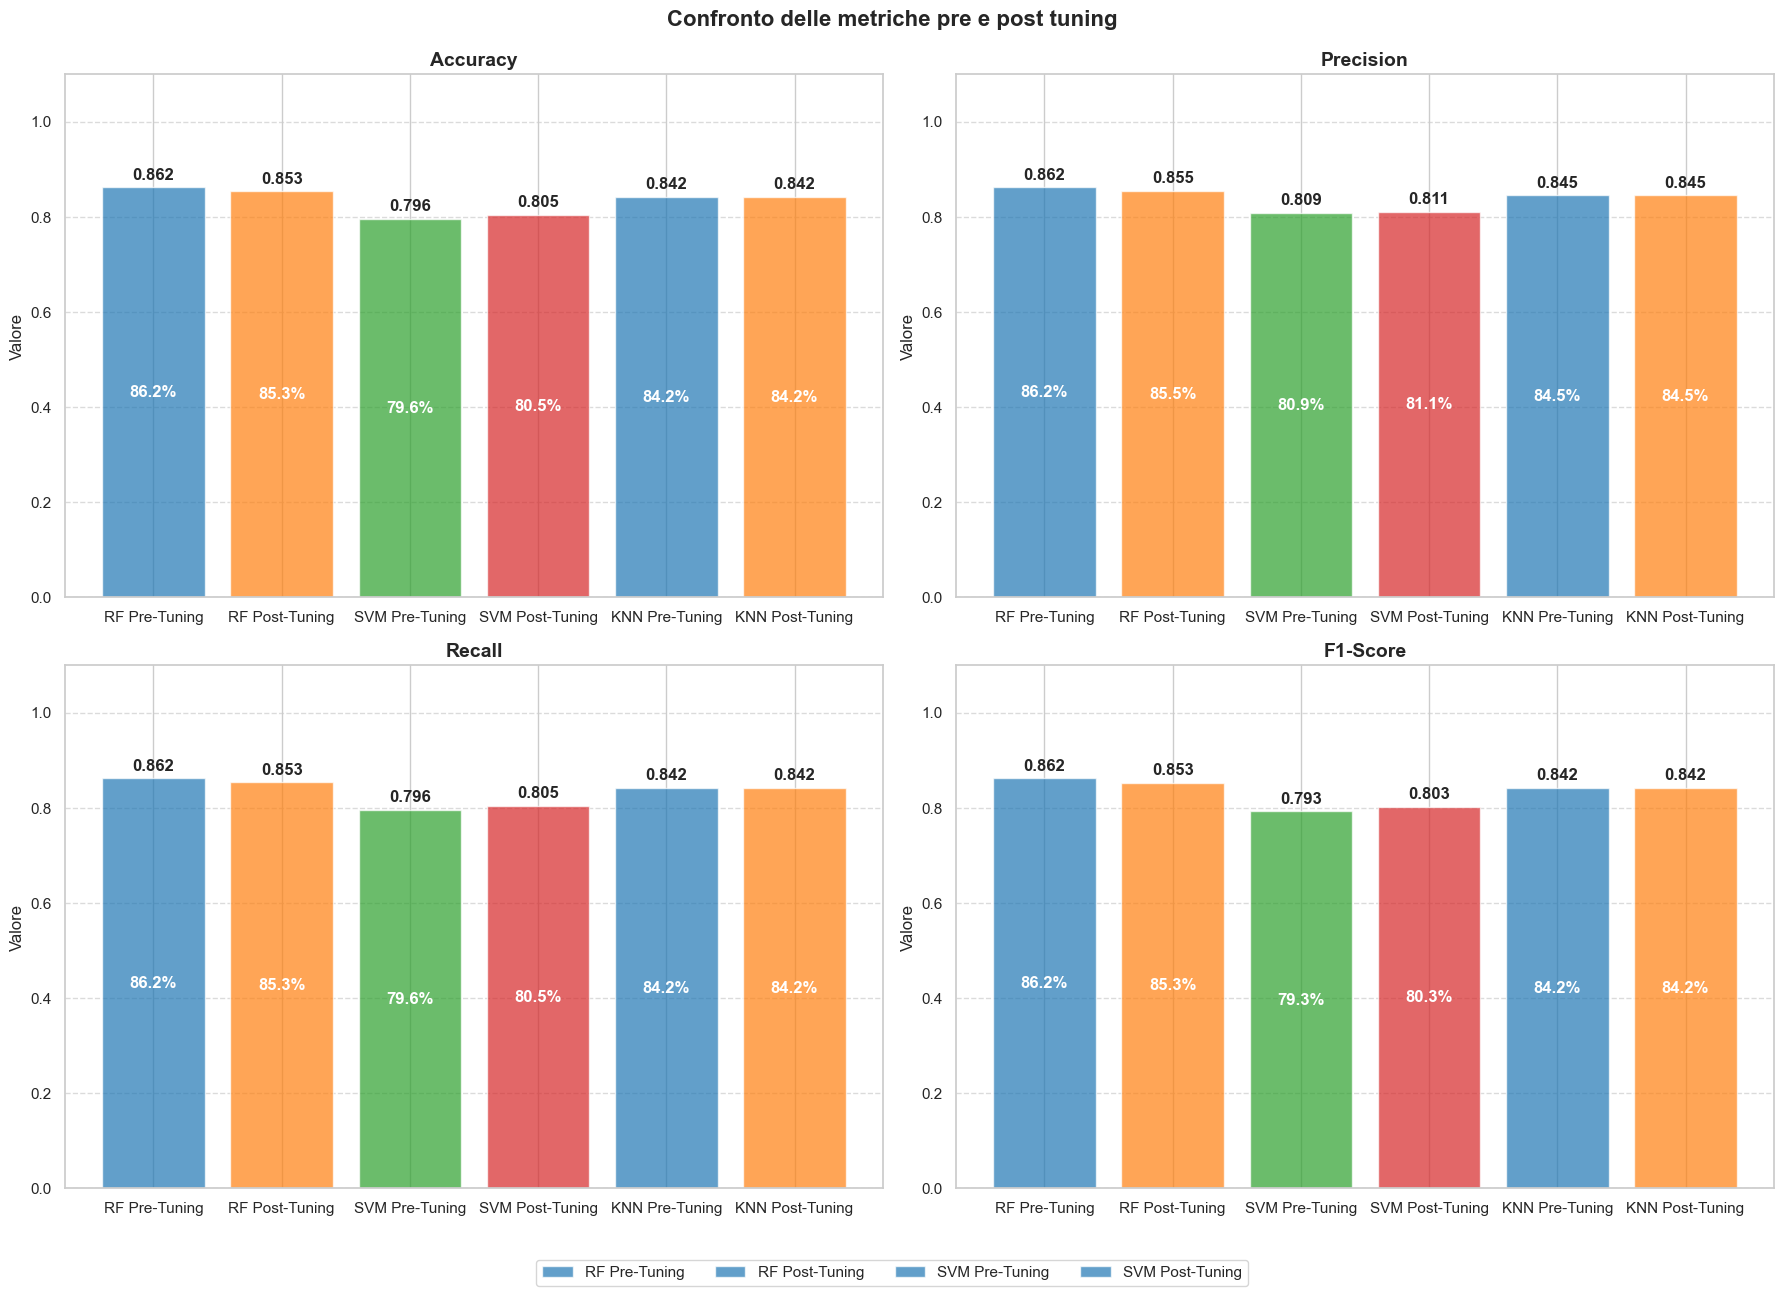

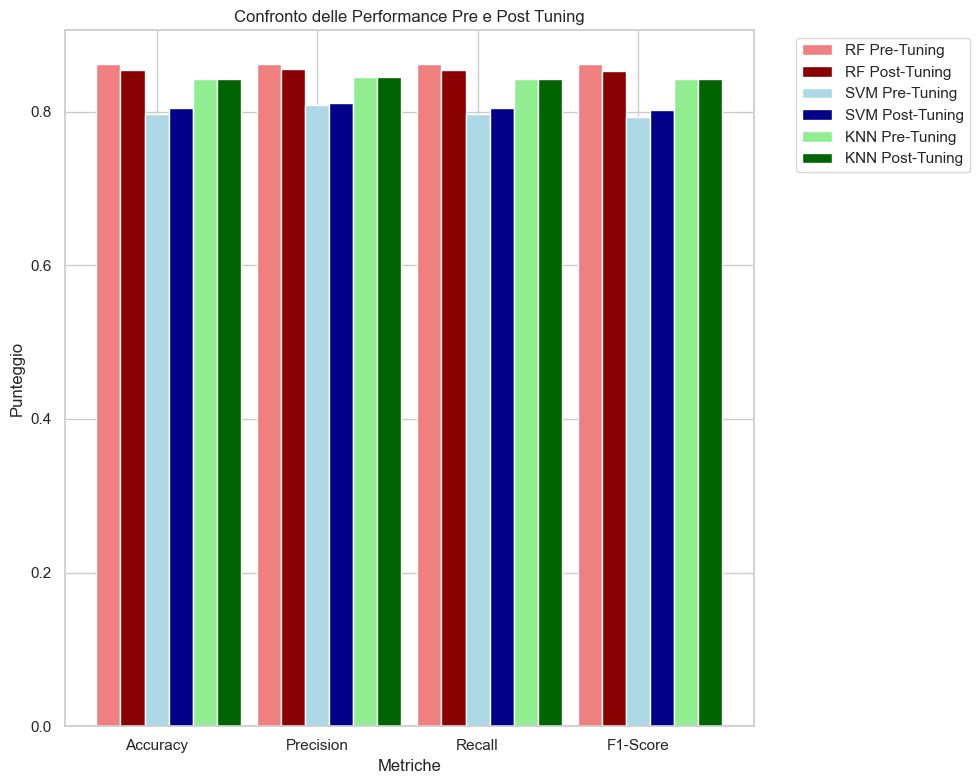

In [160]:
# Visualizzazione tabellare
print("\nConfronto delle metriche pre e post tuning:")
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 3)  # Imposta la precisione decimale

# Mostra i risultati con formattazione migliorata
styled_df = results_df.style.format("{:.3f}", subset=results_df.columns.drop('Metrica'))\
                           .background_gradient(cmap='Blues')\
                           .highlight_max(axis=1, subset=results_df.columns.drop('Metrica'), color='lightgreen')
display(styled_df)

# Creazione di grafici per confrontare le performance
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.flatten()

# Ottieni i nomi dei modelli dalle colonne
models = results_df.columns.drop('Metrica').tolist()
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Colori per distinguere i modelli

# Crea un grafico a barre per ogni metrica
for i, metric in enumerate(['Accuracy', 'Precision', 'Recall', 'F1-Score']):
    metric_values = results_df[results_df['Metrica'] == metric].iloc[0, 1:].values
    
    ax = axes[i]
    bars = ax.bar(models, metric_values, color=colors[:len(models)], alpha=0.7)
    
    # Aggiungi i valori sopra le barre
    for bar, value in zip(bars, metric_values):
        ax.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.01,
                f'{value:.3f}', ha='center', va='bottom', fontweight='bold')
    
    ax.set_title(f'{metric}', fontsize=14, fontweight='bold')
    ax.set_ylim(0, 1.1)  # Imposta il limite y da 0 a 1.1 per visualizzare meglio i valori
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.set_ylabel('Valore', fontsize=12)
    
    # Aggiungi etichette di percentuale
    for j, value in enumerate(metric_values):
        ax.text(j, value/2, f'{value*100:.1f}%', ha='center', va='center', 
                color='white', fontweight='bold')

plt.tight_layout()
plt.suptitle('Confronto delle metriche pre e post tuning', fontsize=16, fontweight='bold', y=1.02)

# Aggiungi una legenda generale
fig.legend(models, loc='lower center', ncol=len(models), bbox_to_anchor=(0.5, -0.05))

# Mostra il grafico
plt.show()

# Crea anche un grafico radar per confrontare tutte le metriche insieme
plt.figure(figsize=(10, 8))

# Preparazione dei dati per il plotting radar
metrics = results_df['Metrica'].tolist()
x = np.arange(len(metrics))
width = 0.15

# Plot delle barre per ogni algoritmo
plt.bar(x - 2 * width, results_df['RF Pre-Tuning'], width, label='RF Pre-Tuning', color='lightcoral')
plt.bar(x - width, results_df['RF Post-Tuning'], width, label='RF Post-Tuning', color='darkred')
plt.bar(x, results_df['SVM Pre-Tuning'], width, label='SVM Pre-Tuning', color='lightblue')
plt.bar(x + width, results_df['SVM Post-Tuning'], width, label='SVM Post-Tuning', color='darkblue')
plt.bar(x + 2 * width, results_df['KNN Pre-Tuning'], width, label='KNN Pre-Tuning', color='lightgreen')
plt.bar(x + 3 * width, results_df['KNN Post-Tuning'], width, label='KNN Post-Tuning', color='darkgreen')

plt.xlabel('Metriche')
plt.ylabel('Punteggio')
plt.title('Confronto delle Performance Pre e Post Tuning')
plt.xticks(x, metrics)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [161]:
# Calcolo del miglioramento percentuale

def calculate_improvement(pre_tuning, post_tuning):
    return ((post_tuning - pre_tuning) / pre_tuning) * 100


# Calcolo e visualizzazione dei miglioramenti percentuali
improvements = pd.DataFrame({
    'Metrica': metrics,
    'RF Improvement %': calculate_improvement(results_df['RF Pre-Tuning'], results_df['RF Post-Tuning']),
    'SVM Improvement %': calculate_improvement(results_df['SVM Pre-Tuning'], results_df['SVM Post-Tuning']),
    'KNN Improvement %': calculate_improvement(results_df['KNN Pre-Tuning'], results_df['KNN Post-Tuning'])
})

print("\nMiglioramenti percentuali dopo il tuning:")
print(improvements)


Miglioramenti percentuali dopo il tuning:
     Metrica  RF Improvement %  SVM Improvement %  KNN Improvement %
0   Accuracy            -0.979              1.060                0.0
1  Precision            -0.889              0.250                0.0
2     Recall            -0.979              1.060                0.0
3   F1-Score            -1.043              1.168                0.0


##### Confronto Generale
1. **Miglior Classificatore**:
    - Random Forest mostra le performance migliori in assoluto (86.19% pre-tuning)
    - Mantiene il primato anche dopo il tuning

2. **Impatto del Tuning**:
    - SVM: unico algoritmo che beneficia del tuning
    - RF: leggero peggioramento post-tuning
    - KNN: nessun cambiamento dopo il tuning

3. **Stabilità**:
    - KNN mostra la maggiore stabilità (nessuna variazione)
    - RF e SVM mostrano variazioni contenute

### Conclusioni
- Random Forest si conferma come il miglior classificatore per questo problema
- Il tuning non ha portato miglioramenti significativi, suggerendo che i parametri di default erano già ben calibrati
- Tutti i modelli mostrano performance soddisfacenti (accuracy > 79%)
- La stabilità dei risultati tra pre e post tuning suggerisce una buona robustezza dei modell


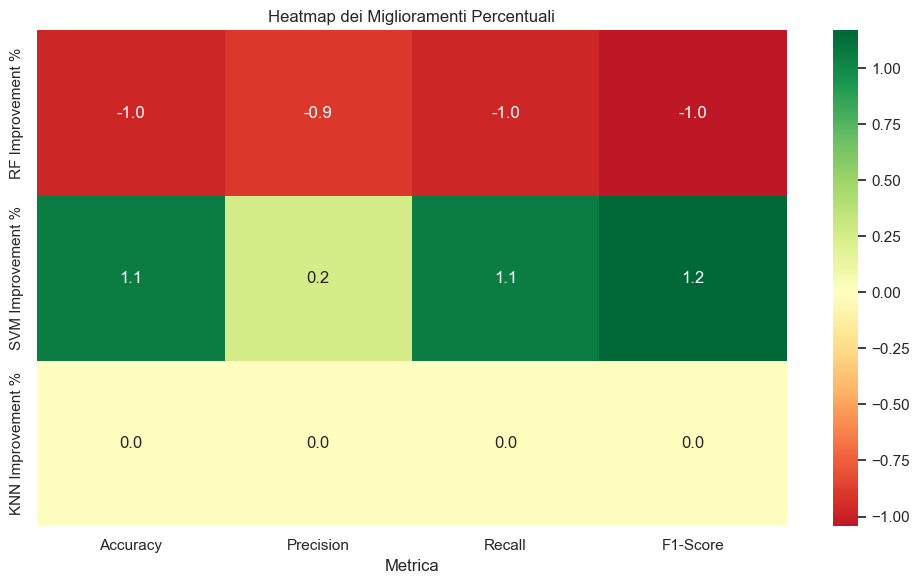

In [162]:
# Visualizzazione dei miglioramenti con heatmap
plt.figure(figsize=(10, 6))
improvement_data = improvements.set_index('Metrica').T
sns.heatmap(improvement_data, annot=True, cmap='RdYlGn', center=0, fmt='.1f')
plt.title('Heatmap dei Miglioramenti Percentuali')
plt.tight_layout()
plt.show()

## Clustering

Vogliamo raggruppare gli studenti in cluster in base alle loro caratteristiche numeriche, senza conoscere in anticipo la loro Casa. Poi confronteremo i cluster con le Case per valutare se esiste una corrispondenza significativa.
Si procede con due algoritmi:
* KMeans
* DBSCAN

### Prepariamo i dati

In [163]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)



### KMeans
K-Means è un algoritmo non supervisionato che suddivide i dati in k cluster, cercando di minimizzare la varianza intra-cluster. Parte con centroidi iniziali e li aggiorna iterativamente.

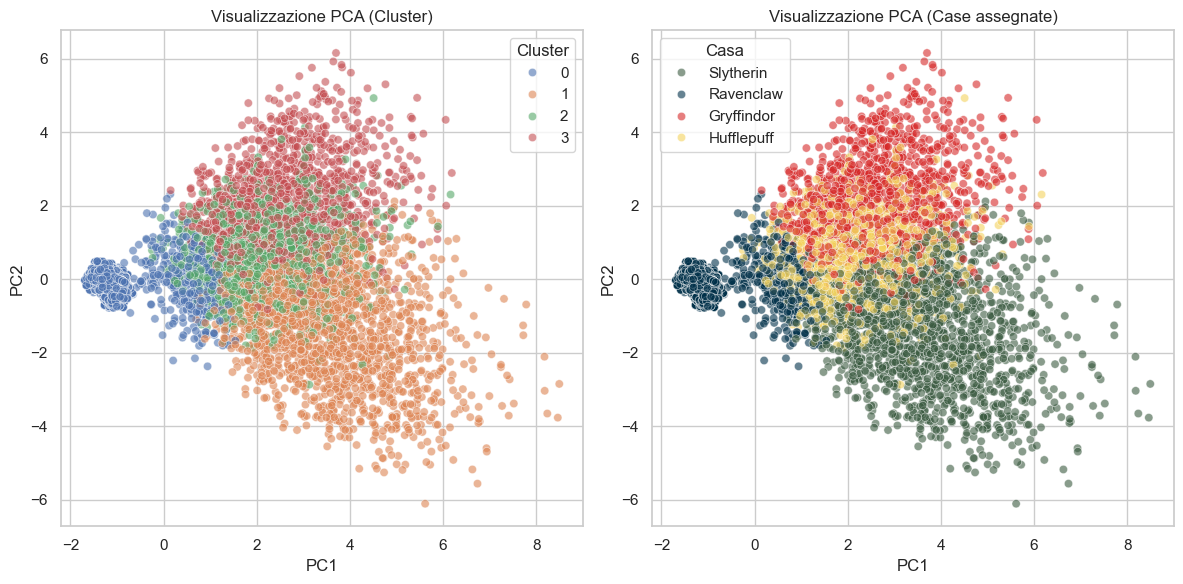

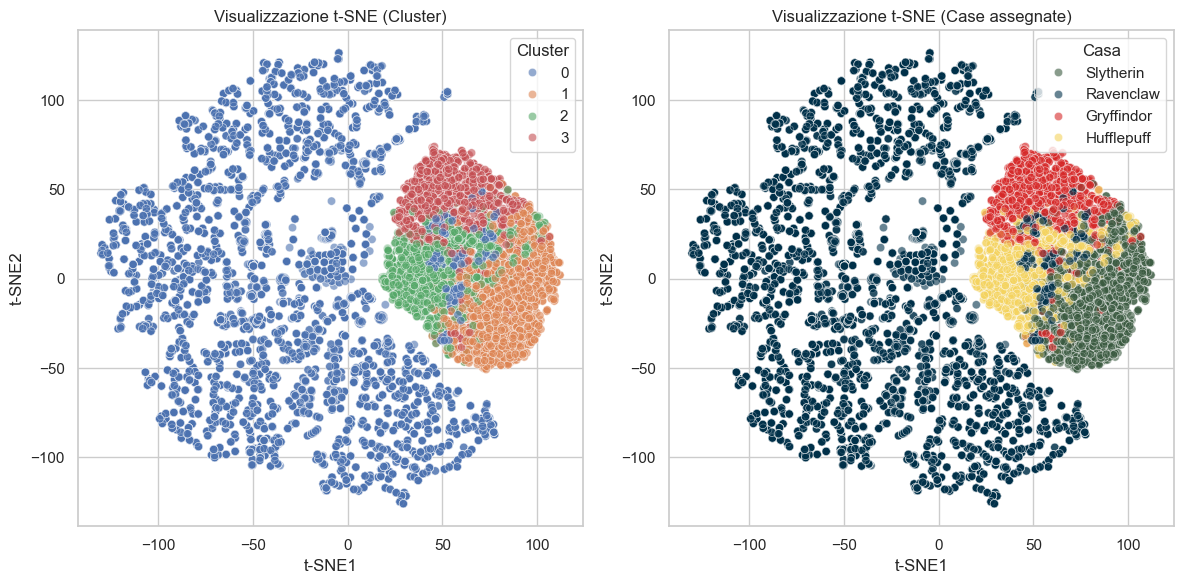


Varianza spiegata dalle componenti principali:
PC1: 44.57%
PC2: 13.31%
Varianza totale spiegata: 57.88%


In [192]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt



# Creiamo un DataFrame per la visualizzazione
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = cluster_labels
df_pca['Casa'] = [mappatura_cluster_casa[c] for c in cluster_labels]

# Plot PCA
plt.figure(figsize=(12, 6))

# Subplot per PCA con colori dei cluster
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Cluster',
                palette='deep', alpha=0.6)
plt.title('Visualizzazione PCA (Cluster)')

# Subplot per PCA con colori delle case
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Casa',
                palette=hue_palette, alpha=0.6)
plt.title('Visualizzazione PCA (Case assegnate)')

plt.tight_layout()
plt.show()

# 2. Visualizzazione con t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Creiamo un DataFrame per la visualizzazione
df_tsne = pd.DataFrame(data=X_tsne, columns=['t-SNE1', 't-SNE2'])
df_tsne['Cluster'] = cluster_labels
df_tsne['Casa'] = [mappatura_cluster_casa[c] for c in cluster_labels]

# Plot t-SNE
plt.figure(figsize=(12, 6))

# Subplot per t-SNE con colori dei cluster
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_tsne, x='t-SNE1', y='t-SNE2', hue='Cluster',
                palette='deep', alpha=0.6)
plt.title('Visualizzazione t-SNE (Cluster)')

# Subplot per t-SNE con colori delle case
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_tsne, x='t-SNE1', y='t-SNE2', hue='Casa',
                palette=hue_palette, alpha=0.6)
plt.title('Visualizzazione t-SNE (Case assegnate)')

plt.tight_layout()
plt.show()

# Stampiamo la varianza spiegata da PCA
print("\nVarianza spiegata dalle componenti principali:")
print(f"PC1: {pca.explained_variance_ratio_[0]:.2%}")
print(f"PC2: {pca.explained_variance_ratio_[1]:.2%}")
print(f"Varianza totale spiegata: {sum(pca.explained_variance_ratio_):.2%}")

In [193]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X, clusters)
print(f"Silhouette Score: {sil_score:.2f}")

Silhouette Score: 0.65


## Analisi dei Centroidi

I centroidi rappresentano il "punto medio" di ciascun cluster nel dataset multidimensionale. Ogni riga rappresenta un cluster e ogni colonna una feature (caratteristica).
I valori sono medi (o medie ponderate) delle feature per i membri del cluster.

In [195]:
# Ottenere i centroidi
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)

# Visualizzare i centroidi
print("Centroidi dei cluster:")
print(centroids)

Centroidi dei cluster:
   Bravery  Intelligence  Loyalty  Ambition  Dark Arts Knowledge  \
0    6.011         6.170    5.965     6.055                4.597   
1   30.096        19.058   17.719    35.482               31.616   
2   23.232        20.301   50.915    20.720               13.170   
3   23.798        47.416   17.744    18.775               13.298   

   Quidditch Skills  Dueling Skills  Creativity  
0             6.313           7.111       6.117  
1            40.795          49.402      18.654  
2            21.216          21.107      18.655  
3            19.014          20.510      46.931  
